## O problemu

**Dataset**: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

**Atributi dataset-a**: <br>
    CustomerID - Jedinstveni ID korisnika <br>
    Churn - Prekid korišćenja usluge kompanije <br>
    Tenure - Staž korisnika u kompaniji <br>
    PreferredLoginDevice - Odabrani uređaj za prijavu korisnika <br>
    CityTier - Nivo grada <br>
    WarehouseToHome - Udaljenost između skladišta i kuće korisnika <br>
    PreferredPaymentMode - Odabrani način plaćanja korisnika <br>
    Gender - Pol korisnika <br>
    HourSpendOnApp - Broj sati provedenih na mobilnoj aplikaciji ili veb stranici kompanije <br>
    NumberOfDeviceRegistered - Ukupan broj uređaja registrovan na određenog korisnika <br>
    PreferedOrderCat - Odabrana kategorija narudžbine korisnika u poslednjem mesecu <br>
    SatisfactionScore - Ocena zadovoljstva korisnika uslugom <br>
    MaritalStatus - Bračni status korisnika <br>
    NumberOfAddress - Ukupan broj dodatih adresa određenog korisnika <br>
    Complain - Da li je podneta žalba u poslednjem mesecu <br>
    OrderAmountHikeFromlastYear - Postotno povećanje porudžbine u odnosu na prošlu godinu <br>
    CouponUsed - Ukupan broj korišćenih kupona u poslednjem mesecu <br>
    OrderCount - Ukupan broj porudžbina koje su postavljene u poslednjem mesecu <br>
    DaySinceLastOrder - Dani od poslednje porudžbine korisnika <br>
    CashbackAmount - Prosečan povraćaj novca u poslednjem mesecu <br>

## Priprema i preobrada podataka

### Importovanje biblioteka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

### Ucitavanje podataka

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (5630, 20)


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

### Informacije o podacima

In [4]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

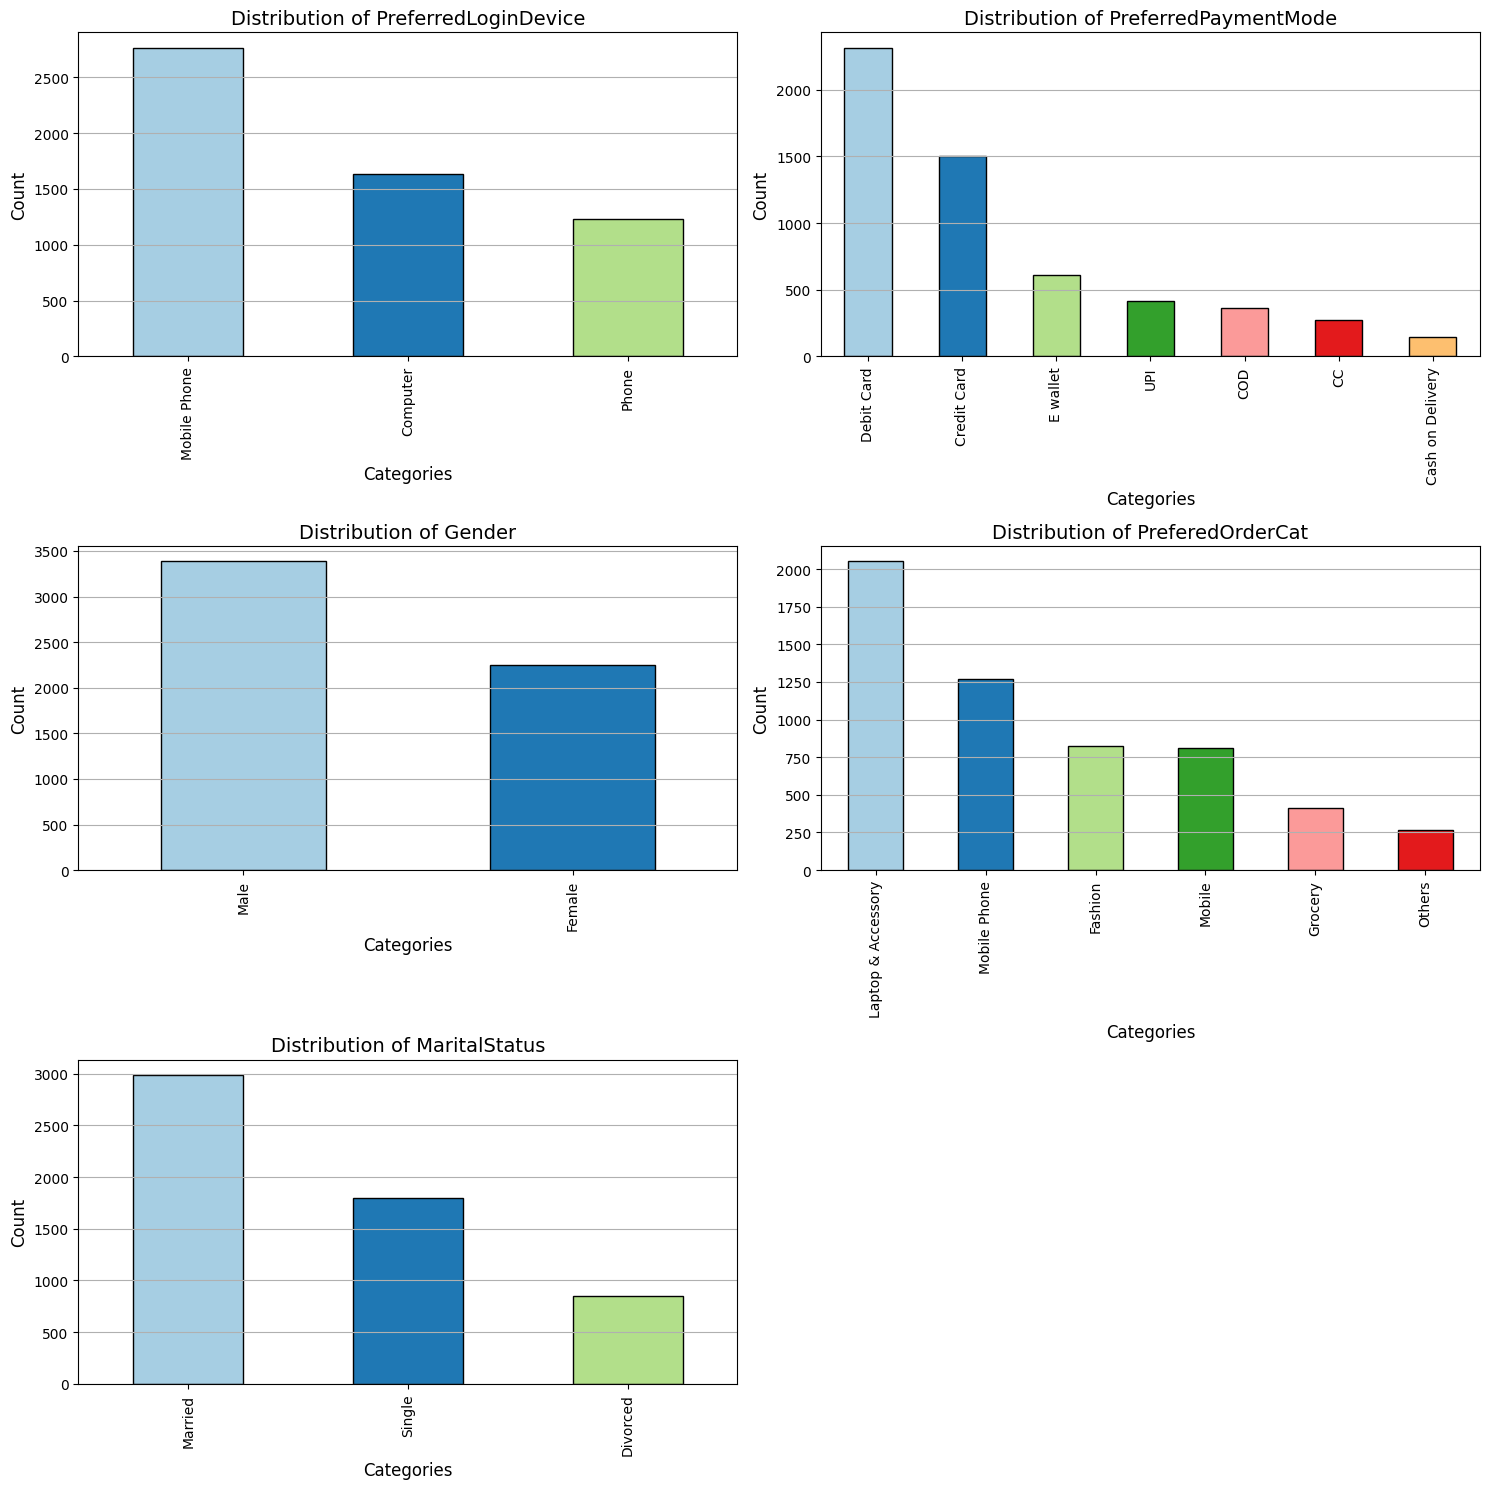

In [6]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors, edgecolor='black')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

Primećuje se da fičer PrefferedPaymentMode ima duplirane vrednosti (par vrednosti CC i CreditCard, kao i par COD i Cash On Delivery). Stoga je potrebno svaki par objediniti u jedinstvenu vrednost.

In [7]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [8]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

Slično, vrednosti Mobile Phone i Phone fičera PreferredLoginDevice mogu se objediniti u jedinstvenu vrednost.

In [9]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [10]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

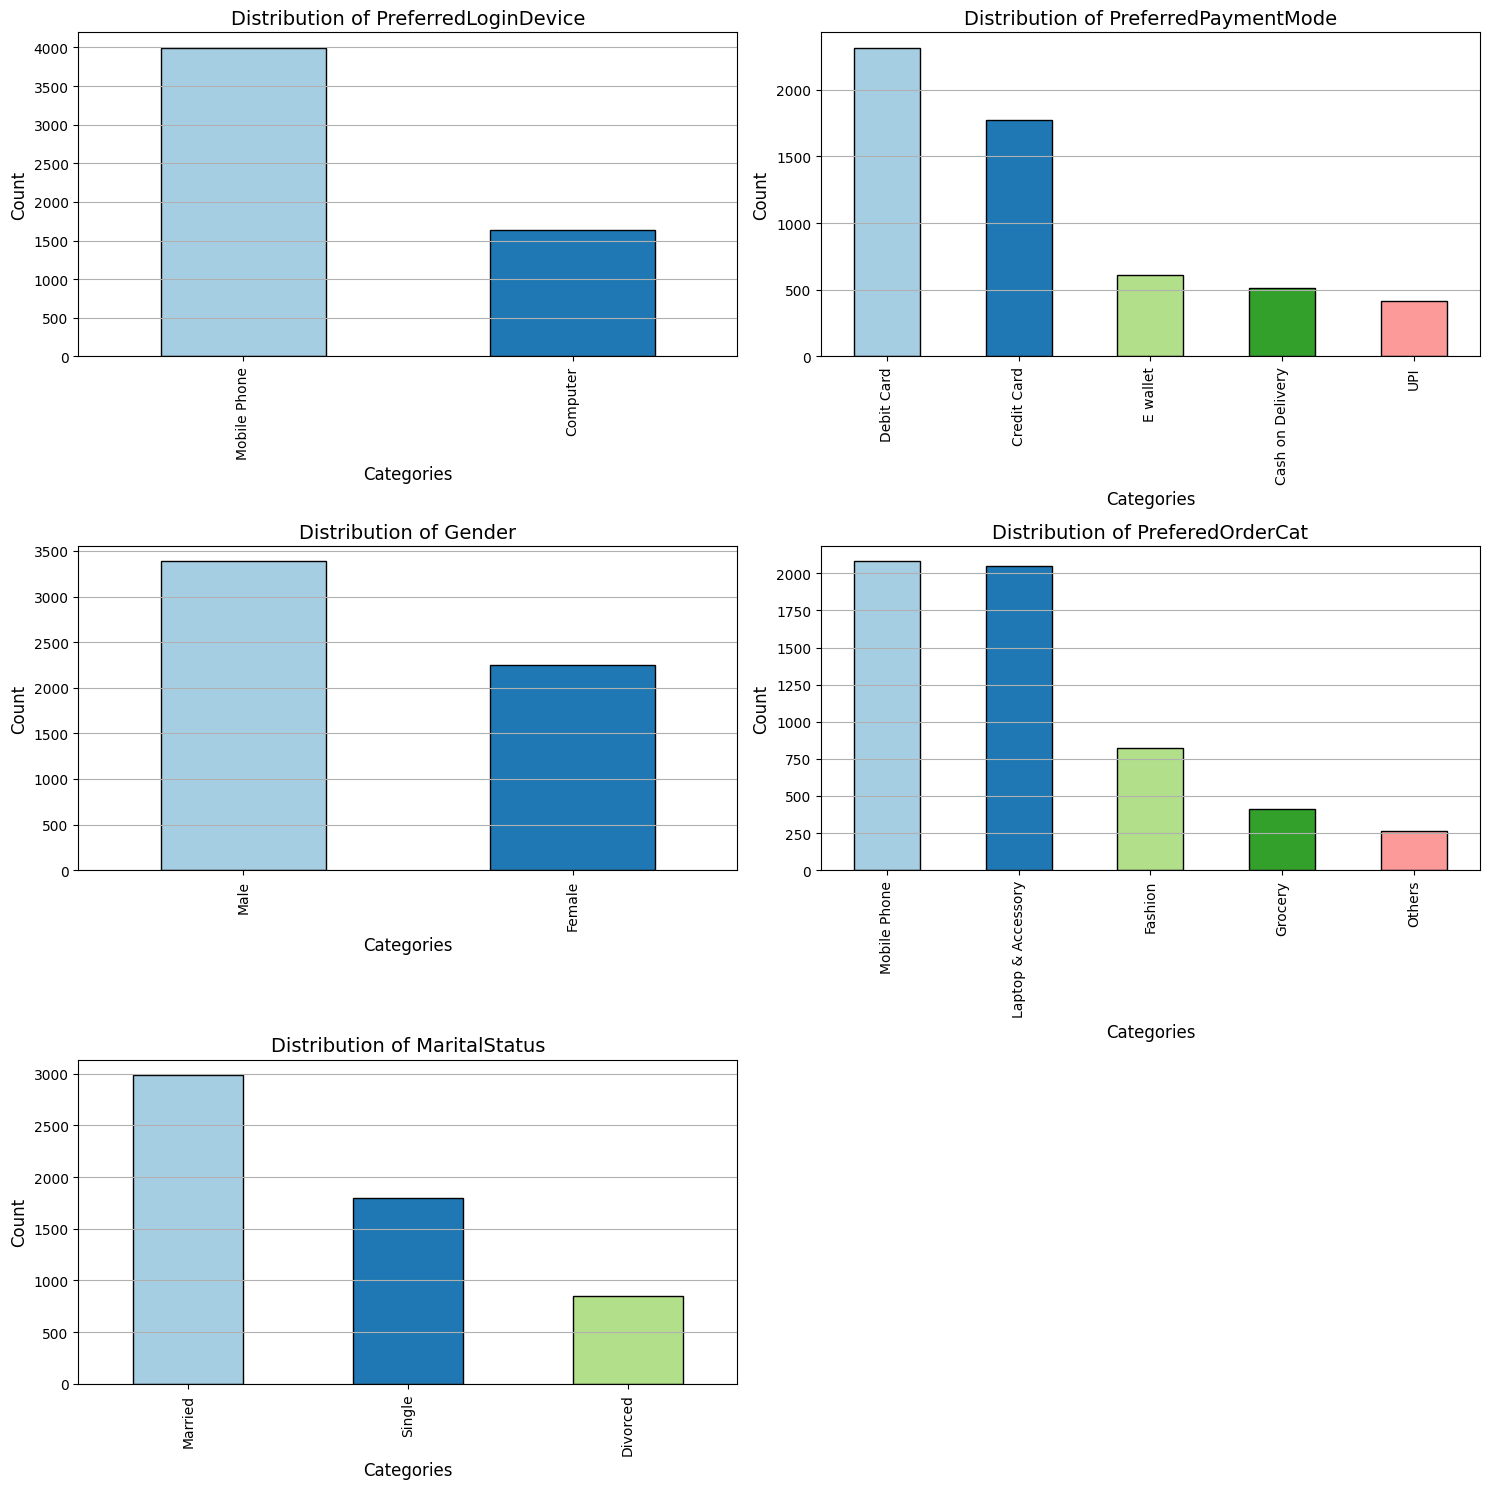

In [11]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors, edgecolor='black')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

In [12]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              2
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              5
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  5
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

### Detekcija duplikata

In [13]:
dupl = df.duplicated()
print('Broj duplikata: %d' % dupl.sum())


Broj duplikata: 0


### Tretman nedostajućih vrednosti

In [14]:
# Procenat nedostajućih vrednosti u svakoj koloni
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

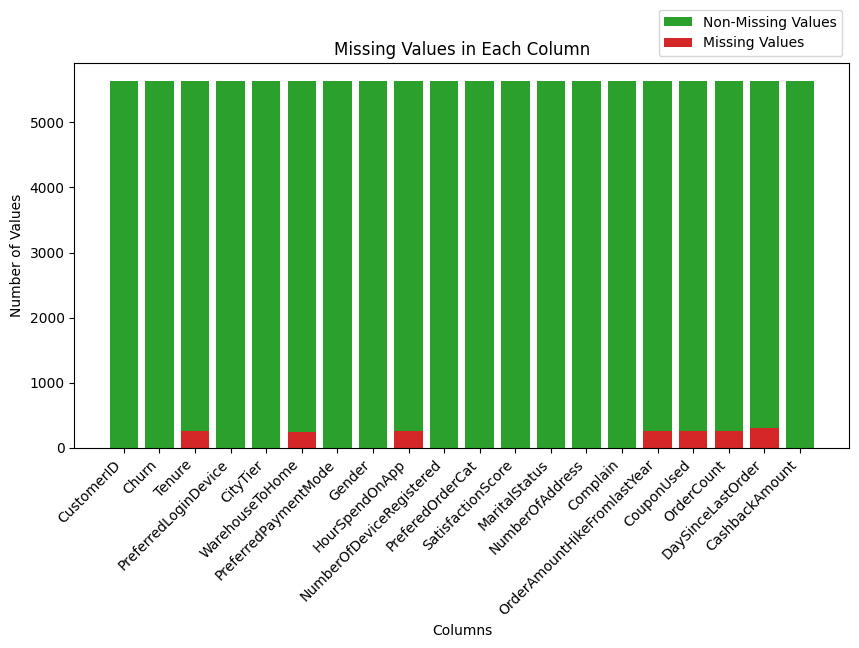

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

Sve nedostajuće vrednosti zauzimaju mali udeo u kolonama (manje od 6%), stoga ih možemo popuniti.

Backward fill - rednost nedostajuće celije se popunjava vrednošću iz naredne dostupne celije u istoj koloni.

In [16]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')
df['Tenure'].isnull().sum()

0

Strategija 'most_frequent' - nedostajuće vrednosti će se zameniti vrednošću koja se najčešće javlja u toj koloni.

In [17]:
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))
df['WarehouseToHome'].isnull().sum()

0

Zamene nedostajućih vrednosti nasumično odabranim vrednostima iz iste kolone.

In [18]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))
df['HourSpendOnApp'].isnull().sum()

0

Forward fill - popunjava nedostajuće vrednosti vrednostima prethodne dostupne celije u istoj koloni.

In [19]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

KKNImputer - za zamenu nedostajućih vrednosti koristiti informacije od dva najbliža suseda. 

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])
df['CouponUsed'].isnull().sum()

0

In [21]:
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
df['OrderCount'].isnull().sum()

0

In [22]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')
df['DaySinceLastOrder'].isnull().sum()

0

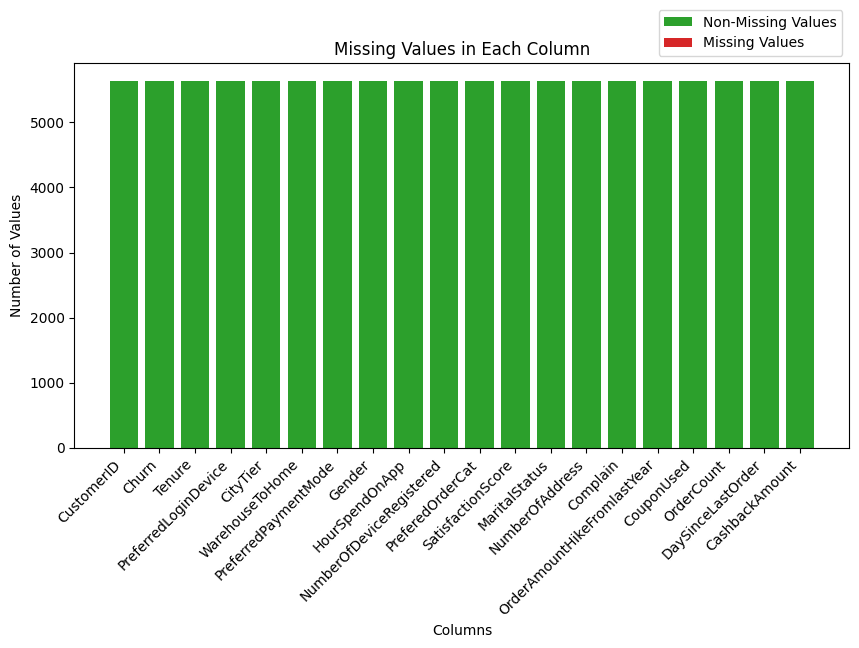

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

### Izbacivanje CustomerID kolone

In [24]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df.shape

(5630, 19)

### Tretman Outliera

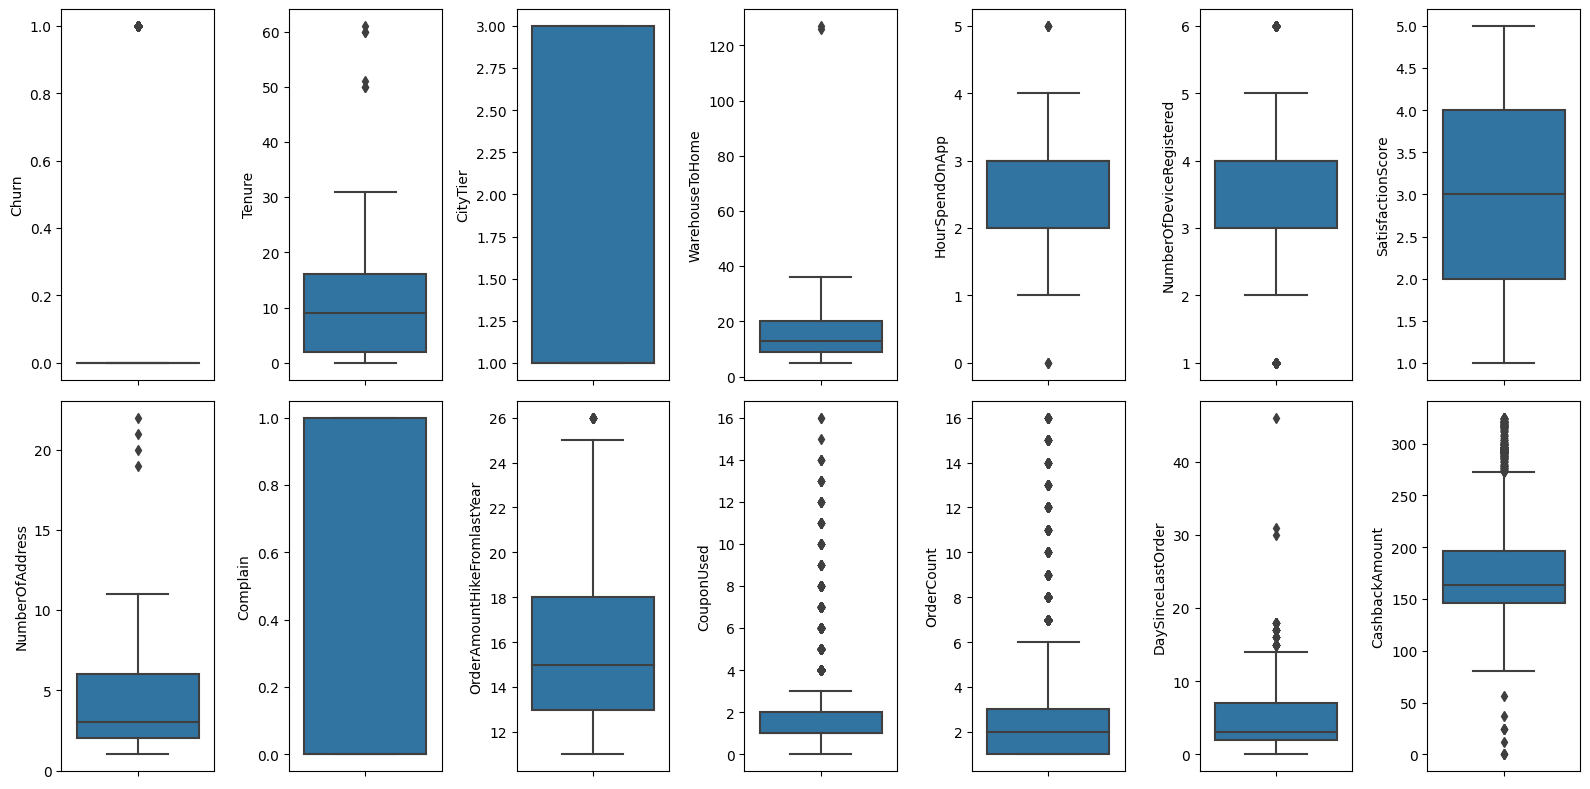

In [25]:
fig, axes = plt.subplots(2, 7, figsize=(16, 8))
numerical_columns = df.select_dtypes(include=['number']).columns

for i, column in enumerate(numerical_columns):
    row = i // 7
    col = i % 7
    sns.boxplot(y=df[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

IRQ metod

In [26]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [27]:
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(10)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     0.0         Mobile Phone         1              8.0   
2      1     0.0         Mobile Phone         1             30.0   
3      1     0.0         Mobile Phone         3             15.0   
4      1     0.0         Mobile Phone         1             12.0   
5      1     0.0             Computer         1             22.0   
6      1    13.0         Mobile Phone         3             11.0   
7      1    13.0         Mobile Phone         1              6.0   
8      1    13.0         Mobile Phone         3              9.0   
9      1     4.0         Mobile Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             4.0                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7          Credit Card    Male             3.0                         3   
8             E wallet    Male             3.0                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7        Mobile Phone                  2      Divorced                3   
8        Mobile Phone                  3      Divorced                2   
9        Mobile Phone                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

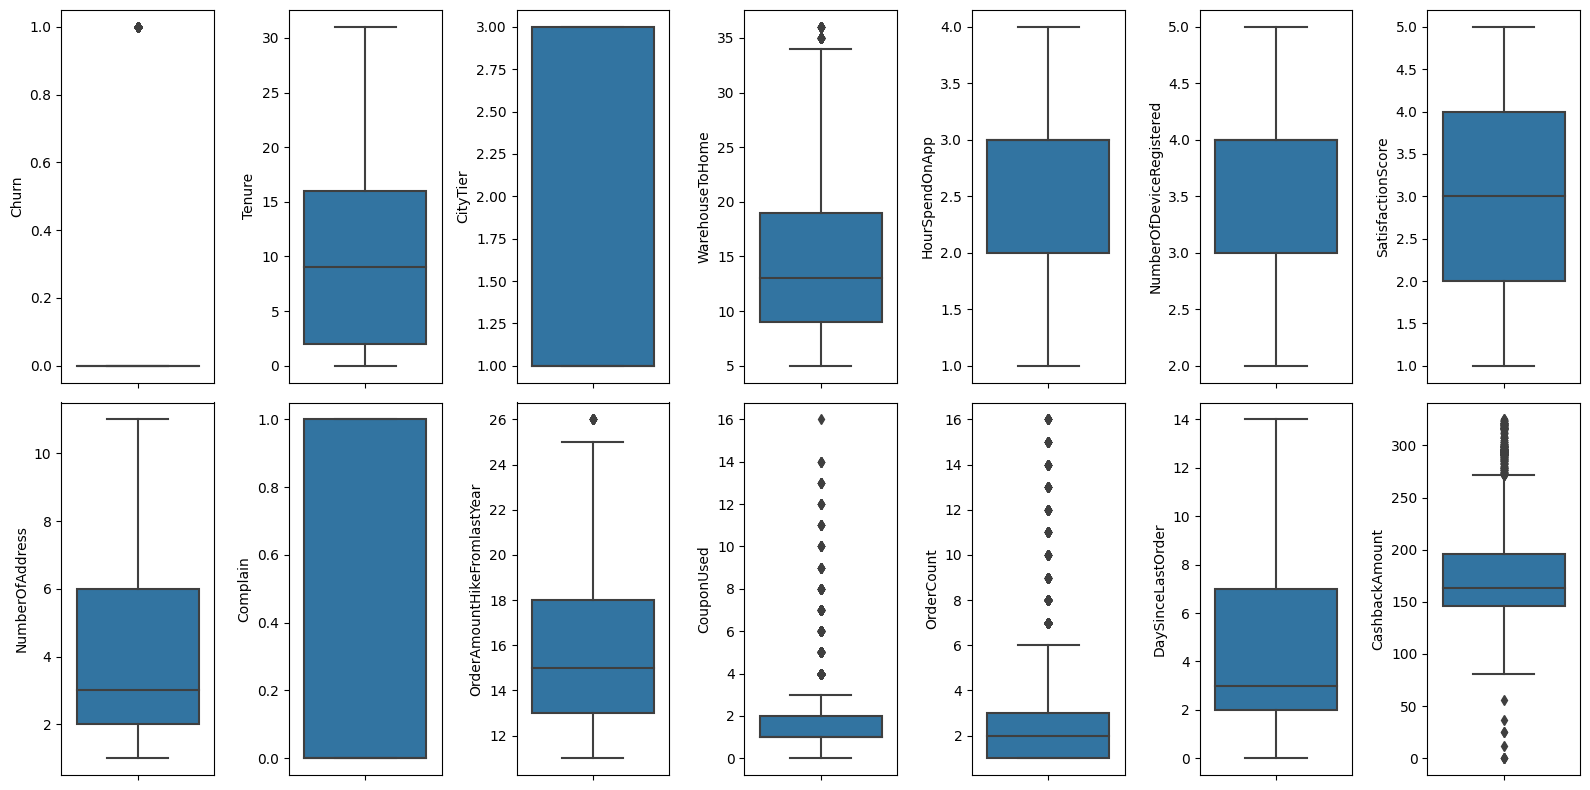

In [28]:
fig, axes = plt.subplots(2, 7, figsize=(16, 8))

for i, column in enumerate(numerical_columns):
    row = i // 7
    col = i % 7
    sns.boxplot(y=df[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

In [29]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.335988  0.069479         0.054775   
Tenure                      -0.335988  1.000000 -0.065607        -0.011852   
CityTier                     0.069479 -0.065607  1.000000         0.014646   
WarehouseToHome              0.054775 -0.011852  0.014646         1.000000   
HourSpendOnApp               0.001399 -0.011924 -0.006362         0.083141   
NumberOfDeviceRegistered     0.078971 -0.019139  0.007025         0.029065   
SatisfactionScore            0.108596 -0.013313 -0.009749         0.013784   
NumberOfAddress              0.033689  0.241084 -0.033390         0.001174   
Complain                     0.252265 -0.023598  0.006136         0.022061   
OrderAmountHikeFromlastYear -0.002508  0.017496 -0.022086         0.028901   
CouponUsed                  -0.017986  0.127576  0.017028         0.013180   
OrderCount                  -0.036599  0.181349  0.035613         0.016233   
DaySinceLastOrder           -0.164534  0.164732  0.023278         0.044890   
CashbackAmount              -0.165216  0.454751  0.044684         0.036336   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                              0.001399                  0.078971   
Tenure                            -0.011924                 -0.019139   
CityTier                          -0.006362                  0.007025   
WarehouseToHome                    0.083141                  0.029065   
HourSpendOnApp                     1.000000                  0.274601   
NumberOfDeviceRegistered           0.274601                  1.000000   
SatisfactionScore                  0.033610                 -0.001059   
NumberOfAddress                    0.135253                  0.071065   
Complain                           0.002075                 -0.002284   
OrderAmountHikeFromlastYear        0.103125                  0.061403   
CouponUsed                         0.183173                  0.135854   
OrderCount                         0.108696                  0.092444   
DaySinceLastOrder                  0.085134                  0.025906   
CashbackAmount                     0.121795                  0.119719   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.108596         0.033689  0.252265   
Tenure                               -0.013313         0.241084 -0.023598   
CityTier                             -0.009749        -0.033390  0.006136   
WarehouseToHome                       0.013784         0.001174  0.022061   
HourSpendOnApp                        0.033610         0.135253  0.002075   
NumberOfDeviceRegistered             -0.001059         0.071065 -0.002284   
SatisfactionScore                     1.000000         0.052404 -0.028593   
NumberOfAddress                       0.052404         1.000000 -0.026849   
Complain                             -0.028593        -0.026849  1.000000   
OrderAmountHikeFromlastYear          -0.021525         0.019552 -0.006868   
CouponUsed                            0.012295         0.042373  0.001497   
OrderCount                            0.011930        -0.002168 -0.007254   
DaySinceLastOrder                    -0.000691        -0.065514 -0.029714   
CashbackAmount                        0.002766         0.193598  0.001564   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Churn                                          -0.002508   -0.017986   
Tenure                                          0.017496    0.127576   
CityTier                                       -0.022086    0.017028   
WarehouseToHome                                 0.028901    0.013180   
HourSpendOnApp                                  0.103125    0.183173   
NumberOfDeviceRegistered                        0.061403    0.135854   
SatisfactionScore                              -0.021525    0.012295   
NumberOfAddress                  

<AxesSubplot: >

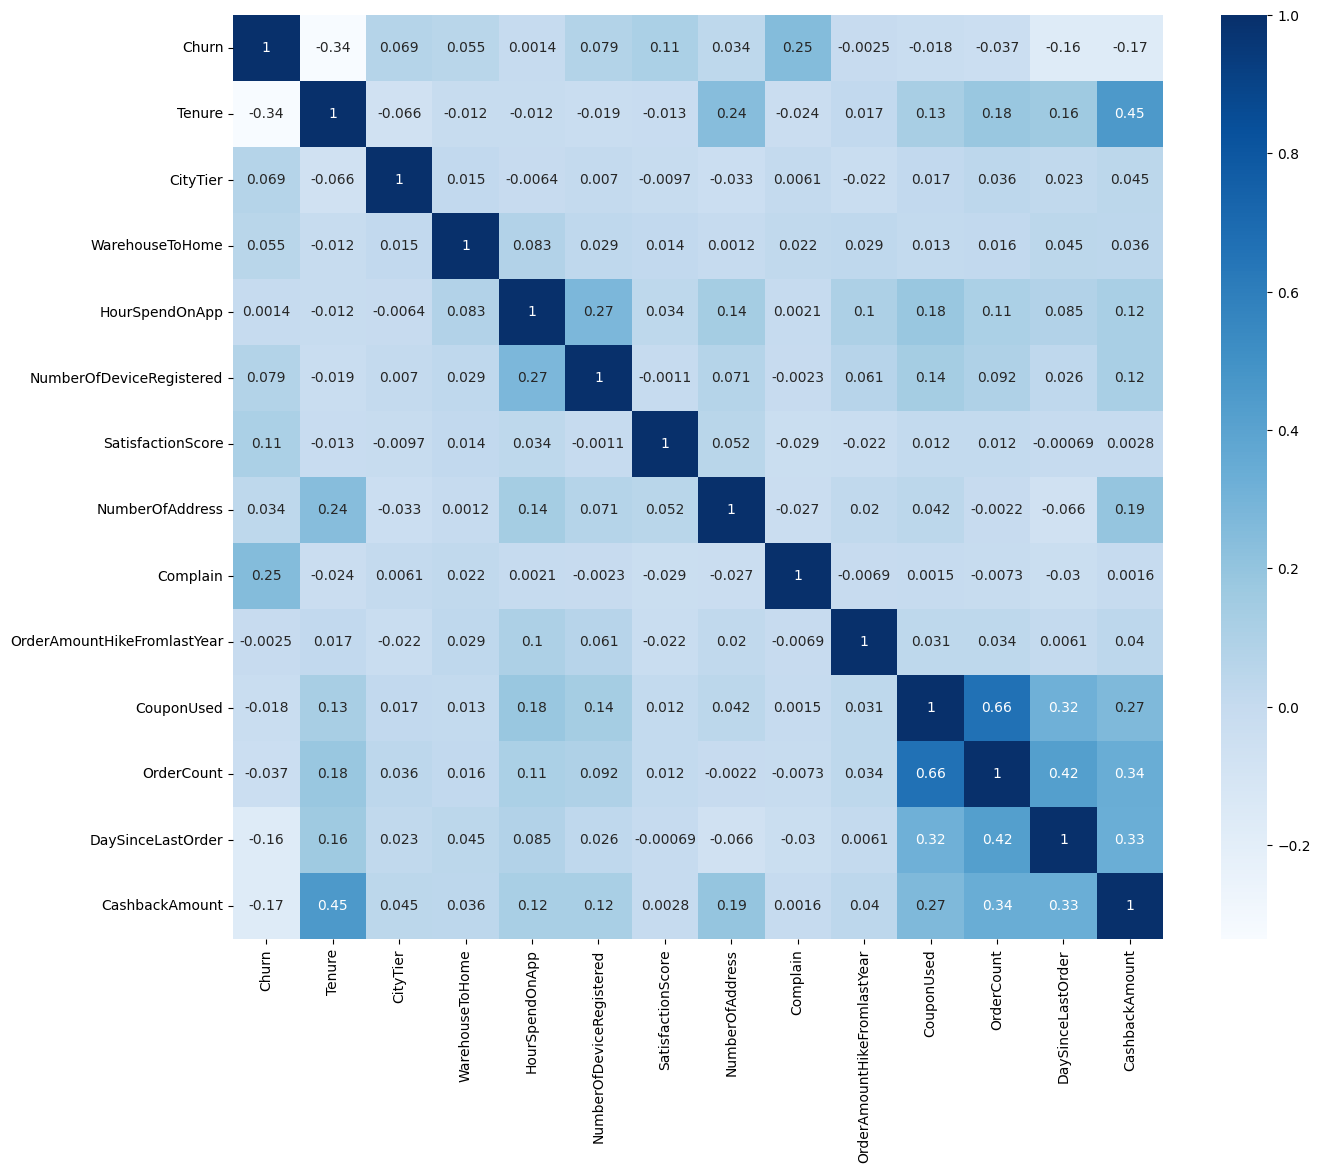

In [30]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

### Kodiranje kategoričkih fičera

In [31]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5153 rows x 5 columns]

Za fičere kod kojih se uočava jasan i prirodan redosled medju vrednostima, kao što je to slučaj kod Gender, PreferredLoginDevice i MaritalStatus, biće korišćen Label Encoder u svrhu kodiranja.  

In [32]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()
columns=['PreferredLoginDevice', 'Gender', 'MaritalStatus']

for i in columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   
4      1     0.0                     1         1             12.0   
5      1     0.0                     0         1             22.0   
6      1    13.0                     1         3             11.0   
7      1    13.0                     1         1              6.0   
8      1    13.0                     1         3              9.0   
9      1     4.0                     1         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card       0             3.0                         3   
1                  UPI       1             3.0                         4   
2           Debit Card       1             2.0                         4   
3           Debit Card       1             2.0                         4   
4          Credit Card       1             4.0                         3   
5           Debit Card       0             3.0                         5   
6     Cash on Delivery       1             2.0                         3   
7          Credit Card       1             3.0                         3   
8             E wallet       1             3.0                         4   
9           Debit Card       1             2.0                         5   

     PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2              2                9   
1        Mobile Phone                  3              2                7   
2        Mobile Phone                  3              2                6   
3  Laptop & Accessory                  5              2                8   
4        Mobile Phone                  5              2                3   
5        Mobile Phone                  5              2                2   
6  Laptop & Accessory                  2              0                4   
7        Mobile Phone                  2              0                3   
8        Mobile Phone                  3              0                2   
9        Mobile Phone                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

S druge strane, za preostale kategoričke fičere, PrefferedPaymentMode i PreferedOrderCat, biće korišćen One Hot Encoding, s obzirom da ne postoji prirodan redosled medju kategorijama vrednosti ovih fičera.

In [33]:
df = pd.get_dummies(df, columns=['PreferredPaymentMode', 'PreferedOrderCat'])

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0      1     4.0                     1         3              6.0       0   
1      1     0.0                     1         1              8.0       1   
2      1     0.0                     1         1             30.0       1   
3      1     0.0                     1         3             15.0       1   
4      1     0.0                     1         1             12.0       1   
5      1     0.0                     0         1             22.0       0   
6      1    13.0                     1         3             11.0       1   
7      1    13.0                     1         1              6.0       1   
8      1    13.0                     1         3              9.0       1   
9      1     4.0                     1         1             31.0       1   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  MaritalStatus  \
0             3.0                         3                  2              2   
1             3.0                         4                  3              2   
2             2.0                         4                  3              2   
3             2.0                         4                  5              2   
4             4.0                         3                  5              2   
5             3.0                         5                  5              2   
6             2.0                         3                  2              0   
7             3.0                         3                  2              0   
8             3.0                         4                  3              0   
9             2.0                         5                  3              2   

   ...  PreferredPaymentMode_Cash on Delivery  \
0  ...                                      0   
1  ...                                      0   
2  ...                                      0   
3  ...                                      0   
4  ...                                      0   
5  ...                                      0   
6  ...                                      1   
7  ...                                      0   
8  ...                                      0   
9  ...                                      0   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                                 0                                1   
1                                 0                                0   
2                                 0                                1   
3                                 0                                1   
4                                 1                                0   
5                                 0                                1   
6                                 0                                0   
7                                 1                                0   
8                                 0                                0   
9                                 0                                1   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   
5                              0                         0   
6                              0                         0   
7                              0                         0   
8                              1                         0   
9                              0                         0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                  

In [34]:
df.dtypes

Churn                                      int64
Tenure                                   float64
PreferredLoginDevice                       int32
CityTier                                   int64
WarehouseToHome                          float64
Gender                                     int32
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
MaritalStatus                              int32
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredPaymentMode_Cash on Delivery      uint8
PreferredPaymentMode_Credit Card           uint8
PreferredPaymentMode_Debit Card            uint8
PreferredPaymentMode

## Klasterizacija

### Skaliranje

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

Churn        Tenure  PreferredLoginDevice      CityTier  \
count  5.153000e+03  5.153000e+03          5.153000e+03  5.153000e+03   
mean   3.309339e-17  5.791344e-17         -1.999393e-17  1.006591e-16   
std    1.000097e+00  1.000097e+00          1.000097e+00  1.000097e+00   
min   -4.485148e-01 -1.201962e+00         -1.562024e+00 -7.195686e-01   
25%   -4.485148e-01 -9.645324e-01         -1.562024e+00 -7.195686e-01   
50%   -4.485148e-01 -1.335283e-01          6.401949e-01 -7.195686e-01   
75%   -4.485148e-01  6.974758e-01          6.401949e-01  1.461571e+00   
max    2.229581e+00  2.478199e+00          6.401949e-01  1.461571e+00   

       WarehouseToHome        Gender  HourSpendOnApp  \
count     5.153000e+03  5.153000e+03    5.153000e+03   
mean      6.067122e-17 -5.860288e-18   -2.647471e-16   
std       1.000097e+00  1.000097e+00    1.000097e+00   
min      -1.262279e+00 -1.219413e+00   -2.690255e+00   
25%      -7.702111e-01 -1.219413e+00   -1.300074e+00   
50%      -2.781431e-01  8.200664e-01    9.010683e-02   
75%       4.599590e-01  8.200664e-01    9.010683e-02   
max       2.551248e+00  8.200664e-01    1.480288e+00   

       NumberOfDeviceRegistered  SatisfactionScore  MaritalStatus  ...  \
count              5.153000e+03       5.153000e+03   5.153000e+03  ...   
mean               8.824905e-17       1.047957e-16  -7.721792e-17  ...   
std                1.000097e+00       1.000097e+00   1.000097e+00  ...   
min               -2.180770e+00      -1.499927e+00  -1.744958e+00  ...   
25%               -9.275629e-01      -7.733005e-01  -2.498185e-01  ...   
50%                3.256441e-01      -4.667441e-02  -2.498185e-01  ...   
75%                3.256441e-01       6.799517e-01   1.245321e+00  ...   
max                1.578851e+00       1.406578e+00   1.245321e+00  ...   

       PreferredPaymentMode_Cash on Delivery  \
count                           5.153000e+03   
mean                           -3.757479e-17   
std                             1.000097e+00   
min                            -3.179125e-01   
25%                            -3.179125e-01   
50%                            -3.179125e-01   
75%                            -3.179125e-01   
max                             3.145519e+00   

       PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
count                      5.153000e+03                     5.153000e+03   
mean                      -5.584510e-17                     2.999089e-17   
std                        1.000097e+00                     1.000097e+00   
min                       -6.792859e-01                    -8.290328e-01   
25%                       -6.792859e-01                    -8.290328e-01   
50%                       -6.792859e-01                    -8.290328e-01   
75%                        1.472134e+00                     1.206225e+00   
max                        1.472134e+00                     1.206225e+00   

       PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  \
count                   5.153000e+03              5.153000e+03   
mean                    2.413060e-17             -3.481701e-17   
std                     1.000097e+00              1.000097e+00   
min                    -3.544019e-01             -2.817594e-01   
25%                    -3.544019e-01             -2.817594e-01   
50%                    -3.544019e-01             -2.817594e-01   
75%                    -3.544019e-01             -2.817594e-01   
max                     2.821655e+00              3.549128e+00   

       PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
count              5.153000e+03              5.153000e+03   
mean              -4.929537e-17              1.103113e-17   
std                1.000097e+00              1.000097e+00   
min               -4.204197e-01             -2.732418e-01   
25%               -4.204197e-01             -2.732418e-01   
50%               -4.204197e-01             -2.732418e-01   
75%               -4.204197e-01             

### K-Means

#### Procena i izbor optimalnog broja klastera 

U svrhu izbora optimalnog broja klastera, upotrebljene su dve metode: Elbow metoda i Silhouette koeficijent

##### Elbow metoda

In [36]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

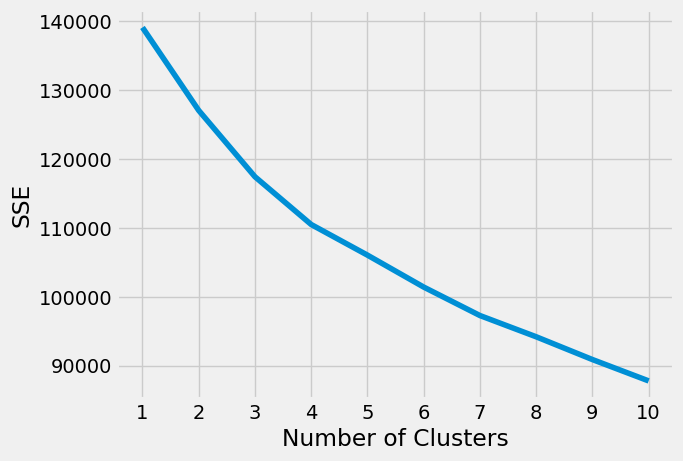

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Elbow metoda daje procenu da je 4 optimalan broj klastera.

##### Silhouette koeficijent

In [39]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [40]:
print(silhouette_coefficients)

[0.07646876776368132, 0.08908730796911919, 0.1122282623444153, 0.09803110451705611, 0.13173806954622194, 0.09666063768770278, 0.11849221446294551, 0.11882281963922463]


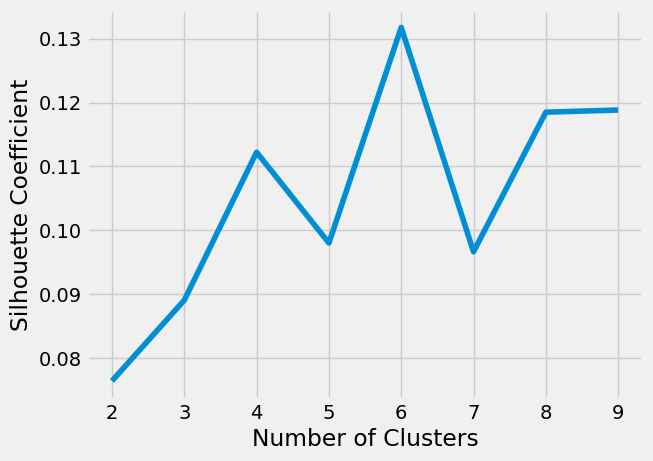

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Silhouette koeficijent ima najveću vrednost za 5 klastera, te zaključujemo da je po ovoj metodi to optimalan broj.

#### Procena i izbor optimalnog broja klastera - yellowbrick

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def elbowDist(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12))
    elbow.fit(df)
    elbow.show()

In [43]:
#elbowDist(df)

In [44]:
def elbowCH(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='calinski_harabasz')
    elbow.fit(df)
    elbow.show()

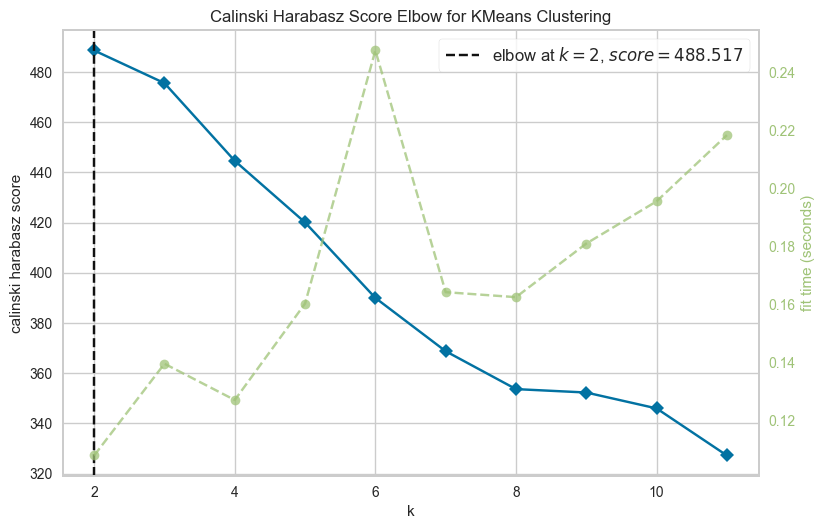

In [45]:
elbowCH(df)

In [46]:
def elbowSil(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='silhouette')
    elbow.fit(df)
    elbow.show()

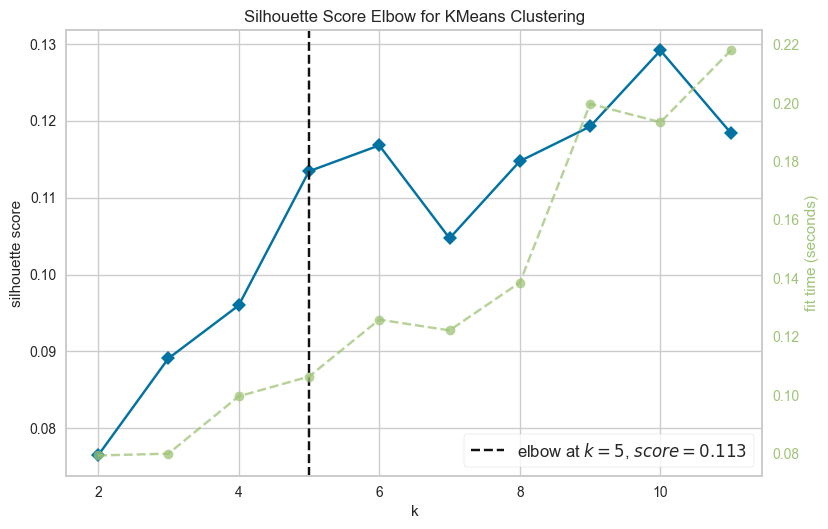

In [47]:
elbowSil(df)

#### PCA predobrada

U slučajevima kada nema koncentracije podataka ili jasne separacije po grupama, preporučuje se pokušaj smanjenja dimenzija podataka pomoću PCA metode.

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum()

array([0.12079935, 0.19539697, 0.25886502, 0.3171095 , 0.36976644,
       0.41924799, 0.4636984 , 0.5077646 , 0.54989302, 0.59094545,
       0.63072706, 0.66988838, 0.70716524, 0.74345805, 0.77855384])

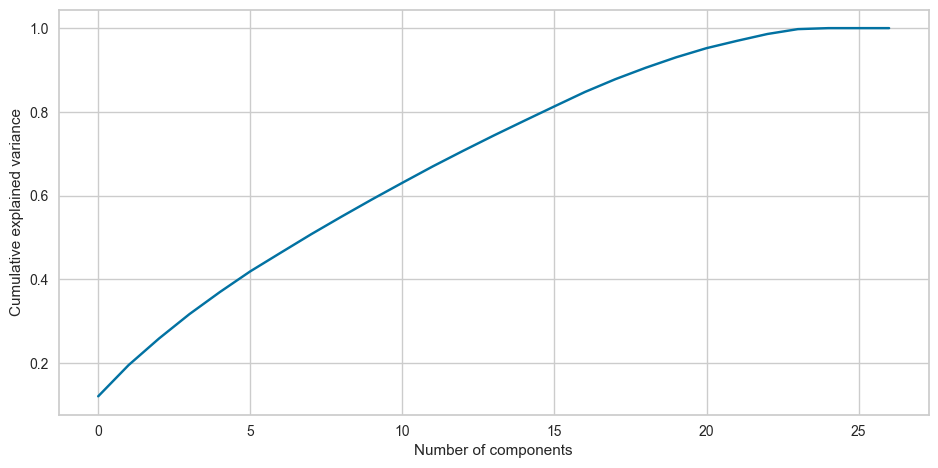

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

S obzirom da prvih 15 PCA dimenzija objašnjava gotovo 80% podataka, opredeljujemo se za primenu PCA sa 15 komponenata.

In [50]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(df)

#### K-Means - 2 klastera

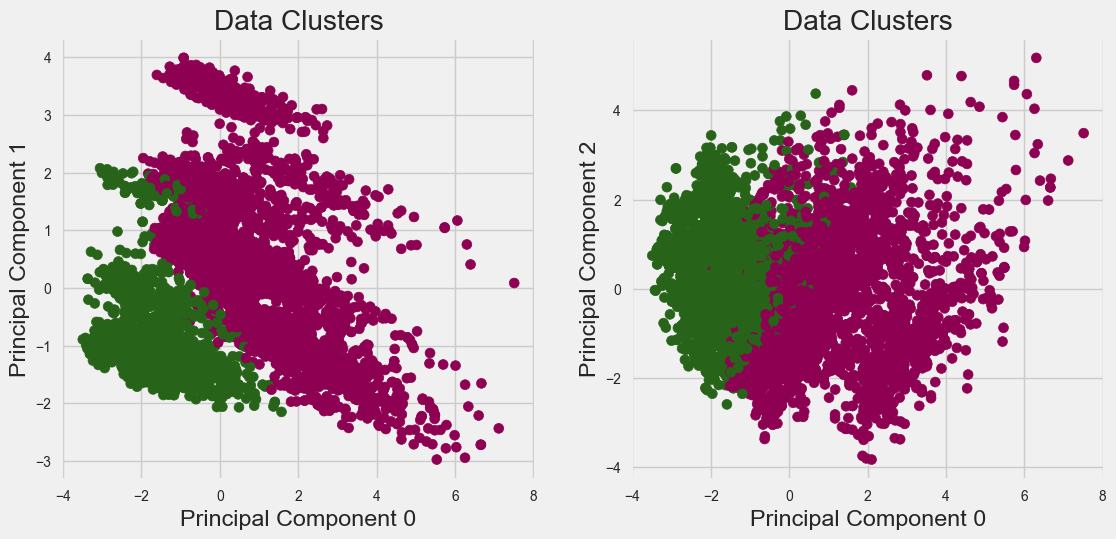

In [201]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

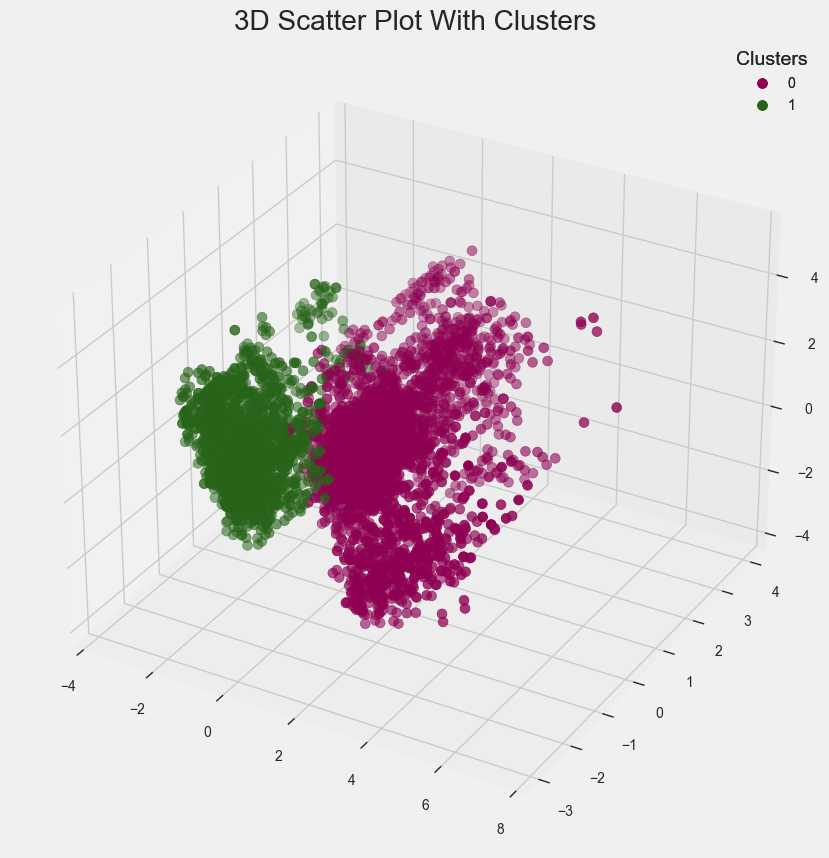

In [202]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

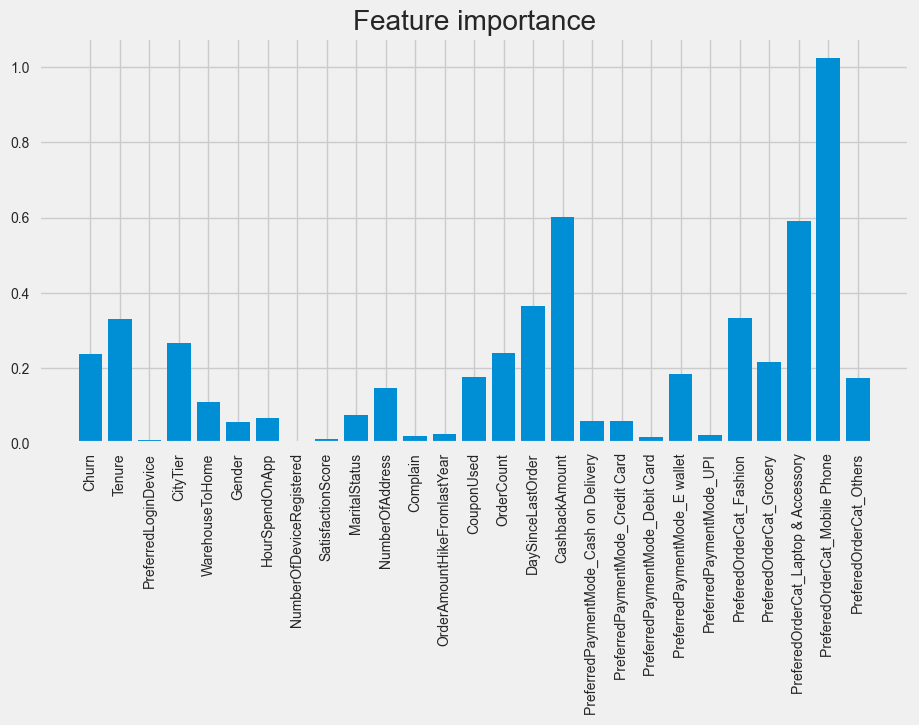

In [205]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [206]:
important_columns = df.columns[feature_importance > 0.3]
print(important_columns)

Index(['Tenure', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone'],
      dtype='object')


In [207]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(2)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(2), index=important_columns)

In [122]:
cluster_data

0         1
Tenure                               0.245693 -0.415689
DaySinceLastOrder                    0.271999 -0.460198
CashbackAmount                       0.447981 -0.757942
PreferedOrderCat_Fashion             0.246704 -0.417400
PreferedOrderCat_Laptop & Accessory  0.440119 -0.744640
PreferedOrderCat_Mobile Phone       -0.762089  1.289383

Klaster 0 - kraće iskustvo sa kompanijom, češće porudžbine, manje povraćaja novca, kupci koji pripadaju ovom klasteru značajno više preferiraju kategoriju Mobilni telefoni <br>
Klaster 1 - duže iskustvo sa kompanijom, redje porudžbine, generalno veći povraćaj novca, osobe koje preferiraju kupovinu proizvoda iz kategorije Fashion and Accessories <br>

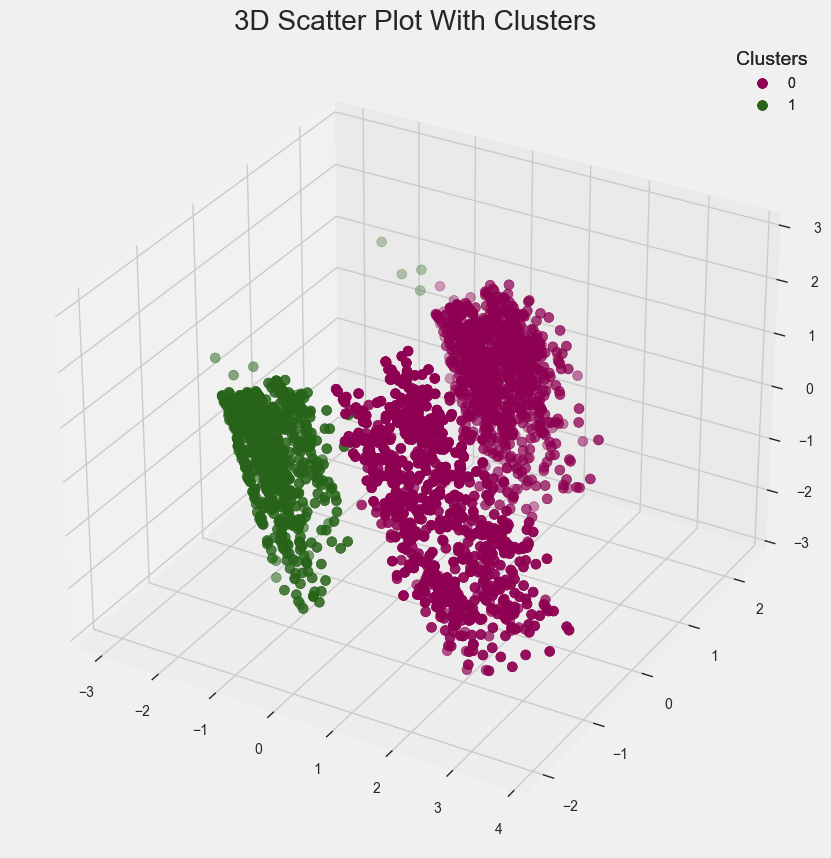

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


selected_columns = ['Tenure', 'DaySinceLastOrder', 'CashbackAmount', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile Phone']

df_selected = df[selected_columns].copy()

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(df_selected)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_selected)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], c=clusters, cmap='PiYG', s=50)

ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

#### K-Means - 4 klastera

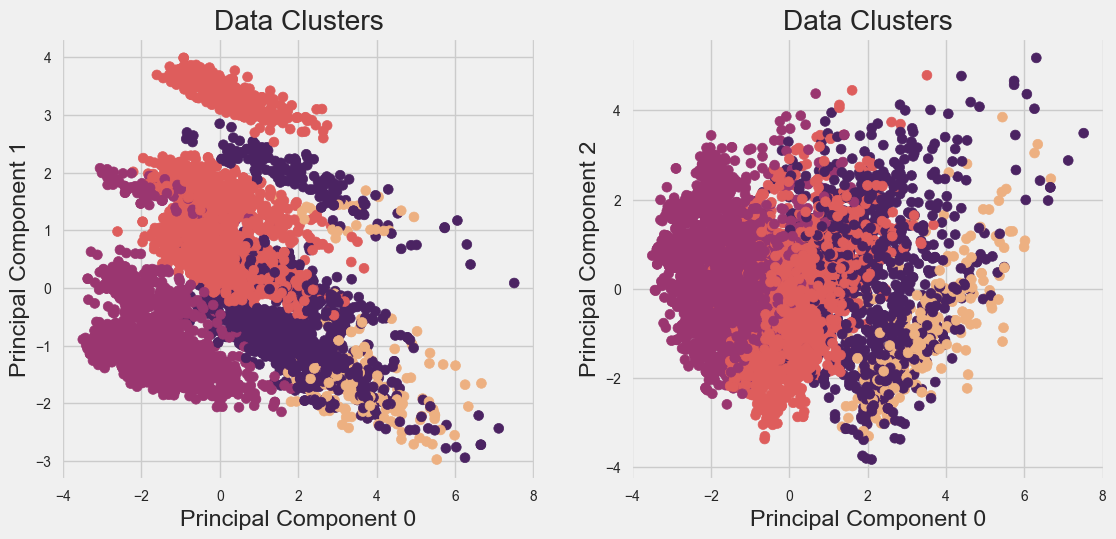

In [209]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

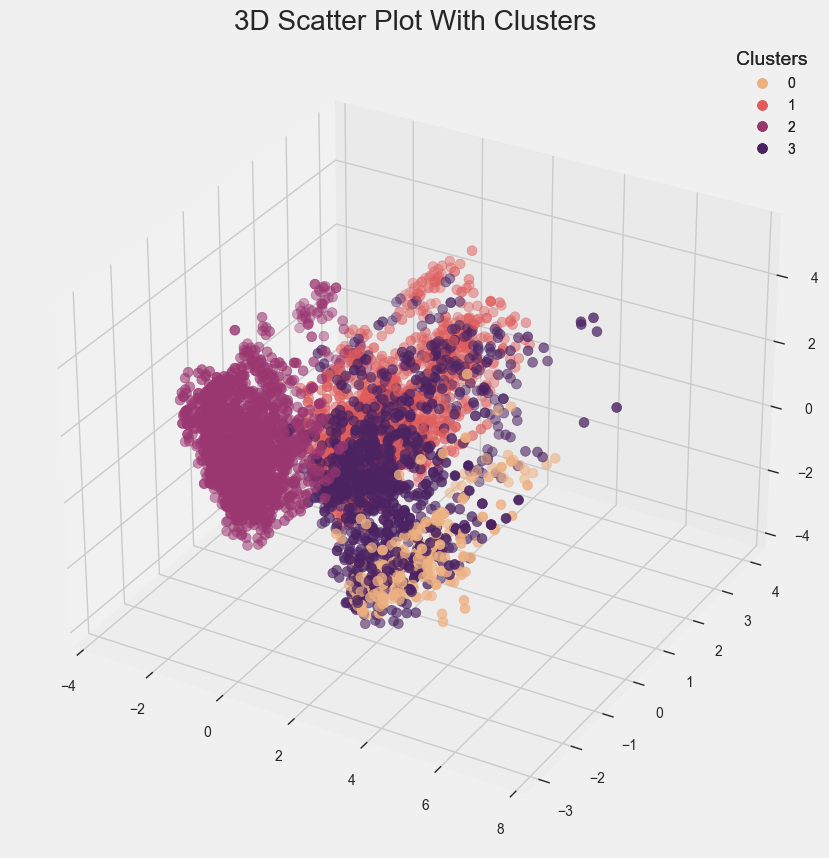

In [210]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

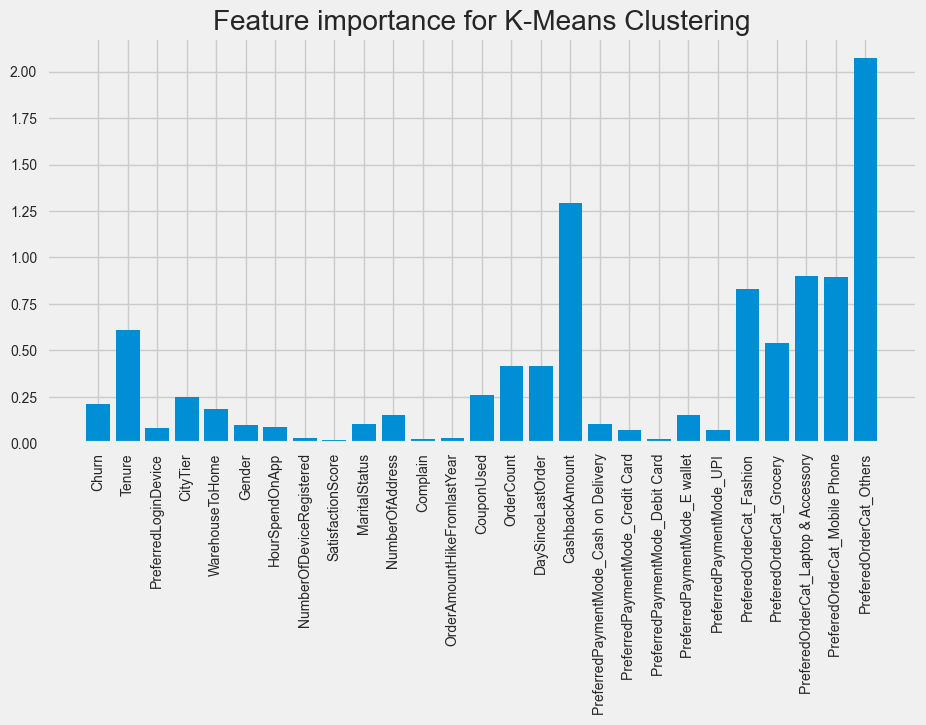

In [211]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

In [212]:
important_columns = df.columns[feature_importance > 0.4]
print(important_columns)

Index(['Tenure', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others'],
      dtype='object')


In [213]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(4)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(4), index=important_columns)

In [214]:
cluster_data

0         1         2         3
Tenure                               1.192275 -0.066511 -0.407702  0.550134
OrderCount                           0.754779 -0.075345 -0.292463  0.461391
DaySinceLastOrder                    0.655772  0.122616 -0.451569  0.421351
CashbackAmount                       2.610031 -0.197664 -0.753149  1.055882
PreferedOrderCat_Fashion            -0.420324 -0.420324 -0.420324  1.493783
PreferedOrderCat_Grocery            -0.273185 -0.273185 -0.273185  0.970868
PreferedOrderCat_Laptop & Accessory -0.757658  1.319857 -0.757658 -0.757658
PreferedOrderCat_Mobile Phone       -0.766563 -0.766563  1.304524 -0.766563
PreferedOrderCat_Others              4.575606 -0.218550 -0.218550 -0.218550

Klaster 0 - kraće iskustvo u kompaniji, manji povraćaj novca, korisnici koji preferiraju kategoriju Mobile Phone <br>
Klaster 1 - duže iskustvo u kompaniji, veći povraćaj novca, korisnici koji značajno više preferiraju kategoriju Fashion <br>
Klaster 2 - (otprilike) srednje iskustvo u kompaniji, mali povraćaj novca, korisnici koji preferiraju kategoriju Laptop & Accessory <br>
Klaster 3 - duže iskustvo u kompaniji, značajno veći povraćaj novca, korisnici koji značajno više preferiraju kategoriju Grocery/Others 

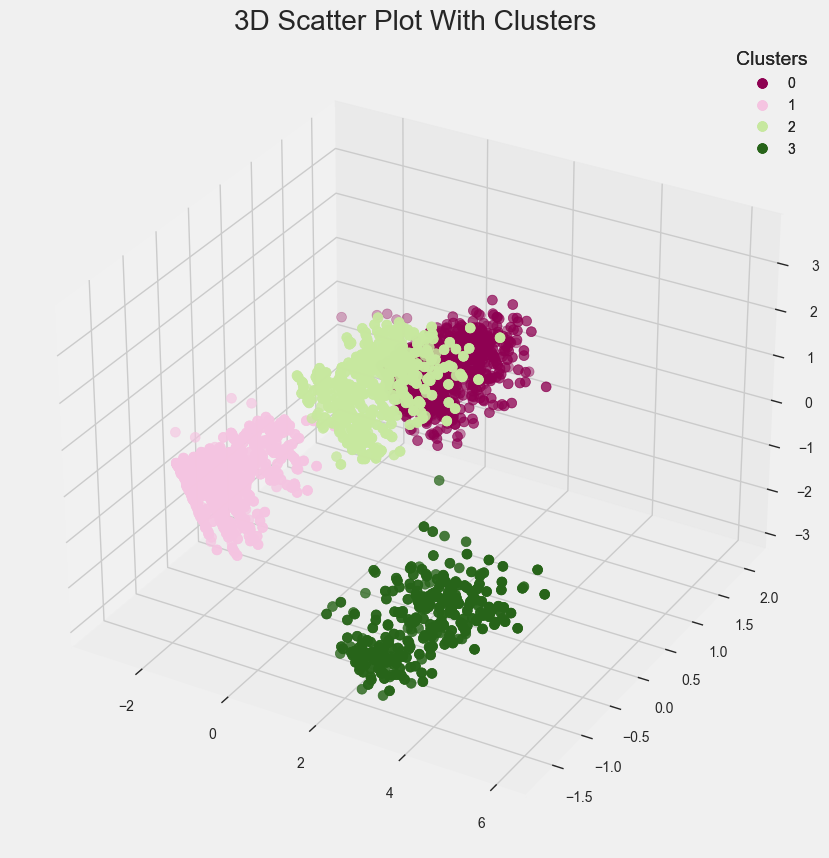

In [215]:
selected_columns = ['Tenure', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others']

df_selected = df[selected_columns].copy()

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(df_selected)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_selected)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], c=clusters, cmap='PiYG', s=50)

ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

#### K-Means - 5 klastera

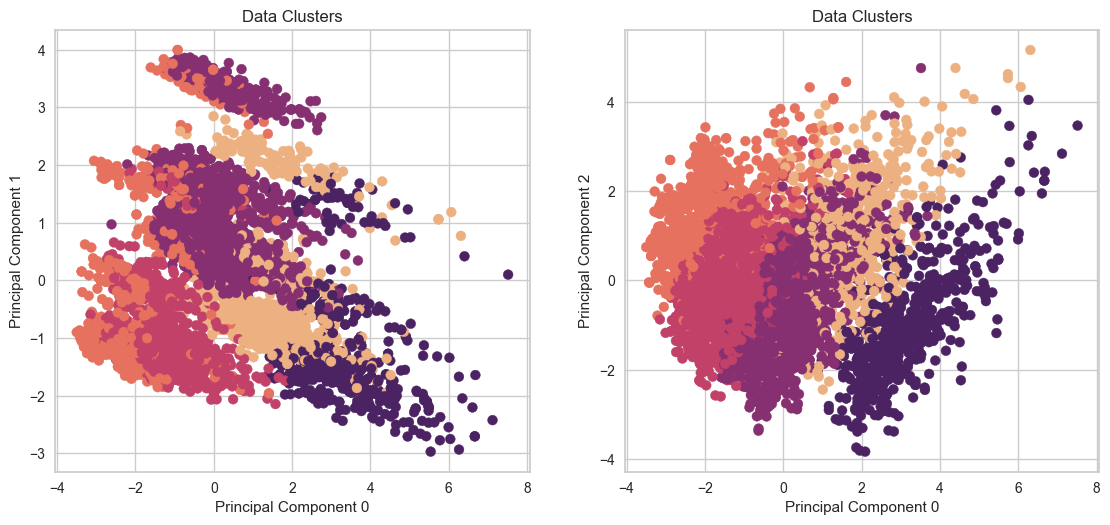

In [51]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

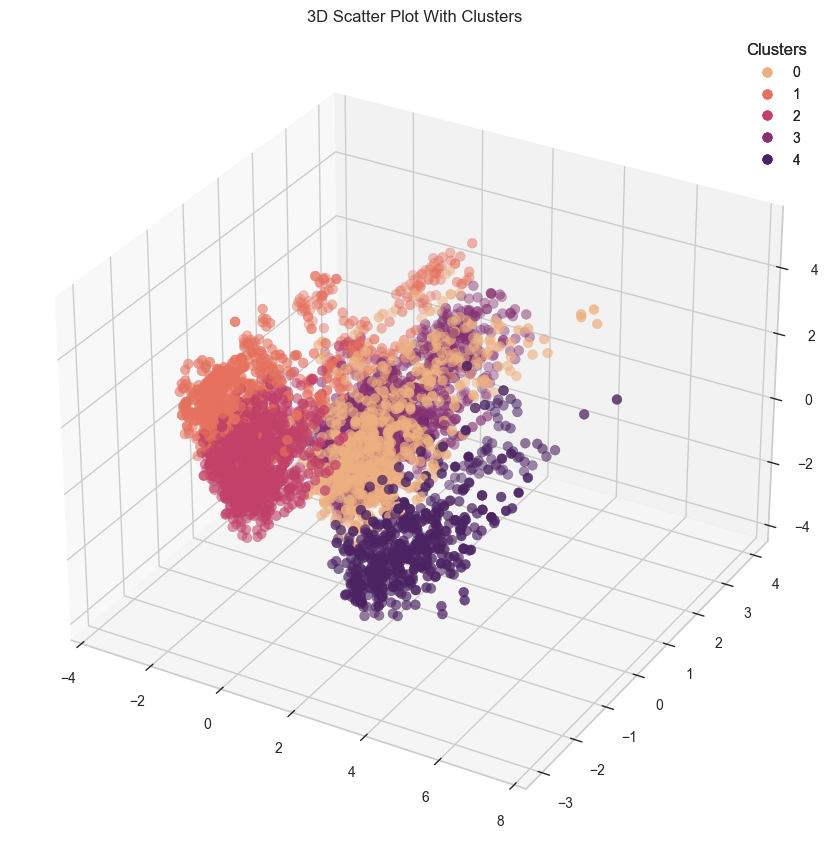

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

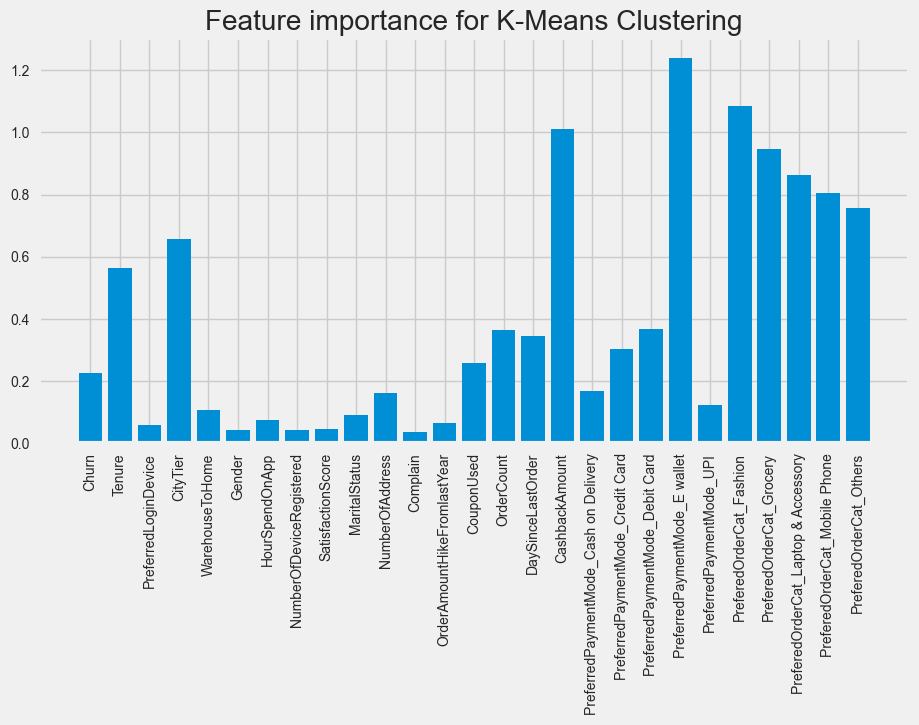

In [218]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

In [219]:
important_columns = df.columns[feature_importance > 0.5]
print(important_columns)

Index(['Tenure', 'CityTier', 'CashbackAmount', 'PreferredPaymentMode_E wallet',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others'],
      dtype='object')


In [220]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(5)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(5), index=important_columns)

In [221]:
cluster_data

0         1         2         3  \
Tenure                              -0.403249  1.225038 -0.146798 -0.049200   
CityTier                            -0.407396 -0.136797  1.461987  0.077350   
CashbackAmount                      -0.748367  2.160303 -0.068569 -0.211283   
PreferredPaymentMode_E wallet       -0.354325 -0.067021  2.822272 -0.354325   
PreferedOrderCat_Fashion            -0.420324 -0.420324  0.177989 -0.420324   
PreferedOrderCat_Grocery            -0.273185  2.103152 -0.242332 -0.273185   
PreferedOrderCat_Laptop & Accessory -0.757658 -0.757658  0.537733  1.319857   
PreferedOrderCat_Mobile Phone        1.304524 -0.766563 -0.457931 -0.766563   
PreferedOrderCat_Others             -0.218550  1.679477 -0.190349 -0.218550   

                                            4  
Tenure                               0.259545  
CityTier                            -0.060033  
CashbackAmount                       0.706864  
PreferredPaymentMode_E wallet       -0.297002  
PreferedOrderCat_Fashion             2.379119  
PreferedOrderCat_Grocery            -0.273185  
PreferedOrderCat_Laptop & Accessory -0.757658  
PreferedOrderCat_Mobile Phone       -0.766563  
PreferedOrderCat_Others             -0.218550

Klaster 0 - kraće iskustvo sa kompanijom, manji povraćaj novca, korisnici koji preferiraju kategoriju Mobile Phone <br>
Klaster 1 - duže iskustvo sa kompanijom, značajno veći povraćaj novca, korisnici koji značajno više preferiraju kategoriju Grocery <br>
Klaster 2 - (otprilike) srednje iskustvo sa kompanijom, mali povraćaj novca, korisnici koji preferiraju kategoriju Laptop & Accessory <br>
Klaster 3 - (otprilike) srednje iskustvo sa kompanijom, veći povraćaj novca, korisnici koji značajno više preferiraju kategoriju Fashion <br>
Klaster 4 - duže iskustvo sa kompanijom, izuzetno veći povraćaj novca, korisnici koji značajno više preferiraju kategoriju Others

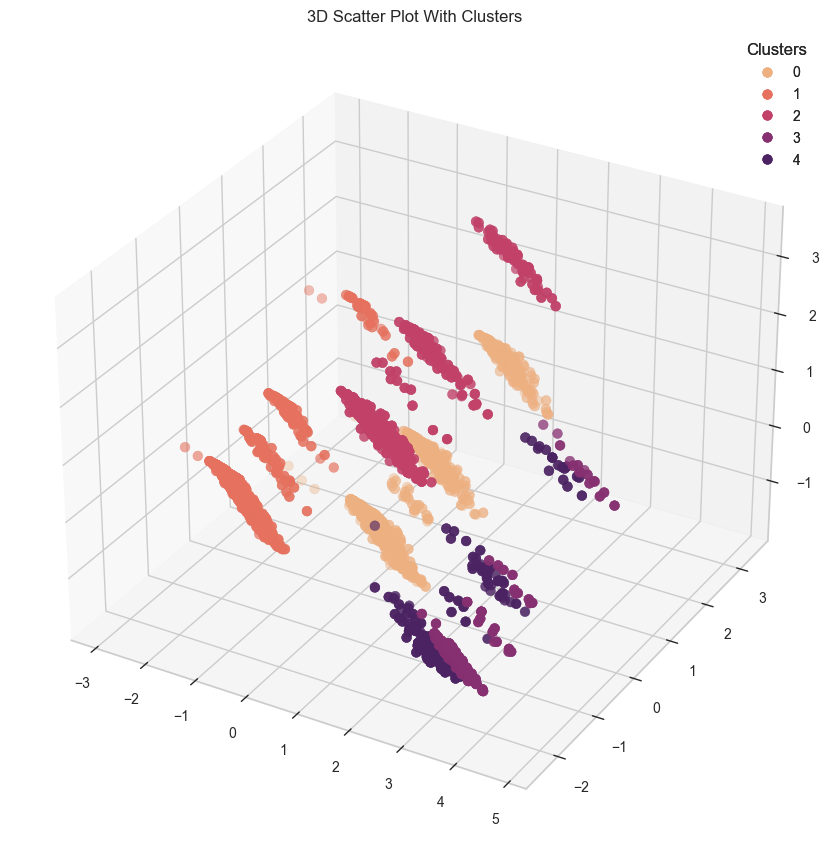

In [53]:
selected_columns = ['Tenure', 'CityTier', 'CashbackAmount', 'PreferredPaymentMode_E wallet',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others']

df_selected = df[selected_columns].copy()

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(df_selected)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_selected)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], c=clusters, cmap='flare', s=50)

ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

### Agglomerative Clustering

#### Procena i izbor optimalnog broja klastera 

In [54]:
from sklearn.cluster import AgglomerativeClustering

# elbow = KElbowVisualizer(AgglomerativeClustering(), k=(2,12))
# elbow.fit(df)
# elbow.show()

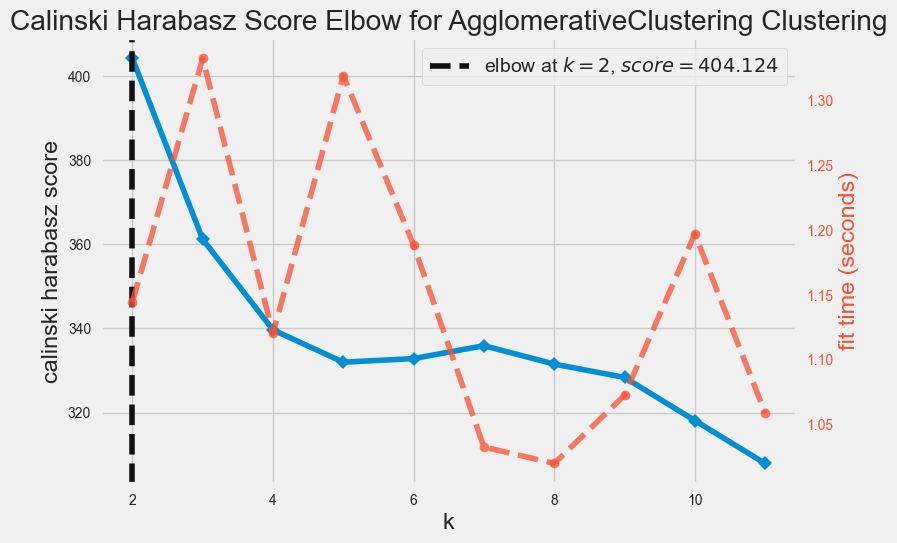

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [142]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=(2,12), metric='calinski_harabasz')
elbow.fit(df)
elbow.show()

Calinski Harabasz metrika procenjuje da je optimalan broj klastera za hijerarhijsku klasterizaciju 2.

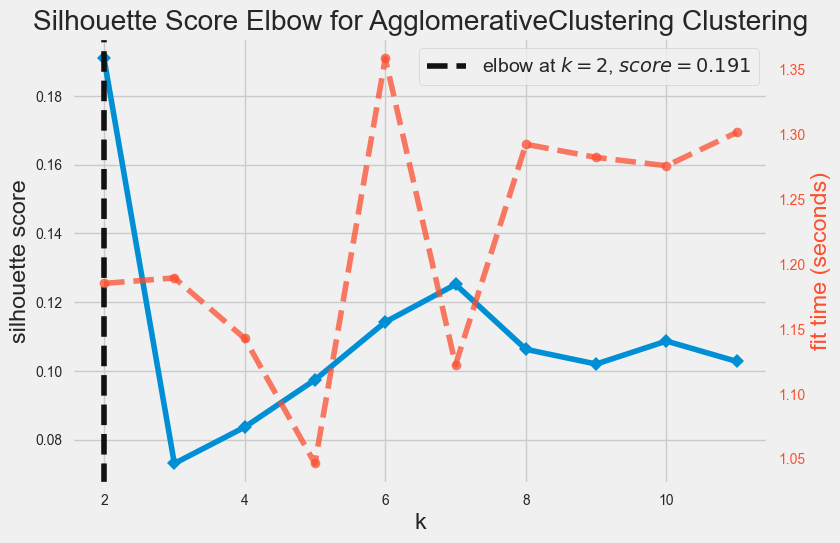

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [143]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=(2,12), metric='silhouette')
elbow.fit(df)
elbow.show()

Slično, silhouette metrika procenjuje da je optimalan broj klastera za hijerarhijsku klasterizaciju 2.

#### Agglomerative - 2 klastera

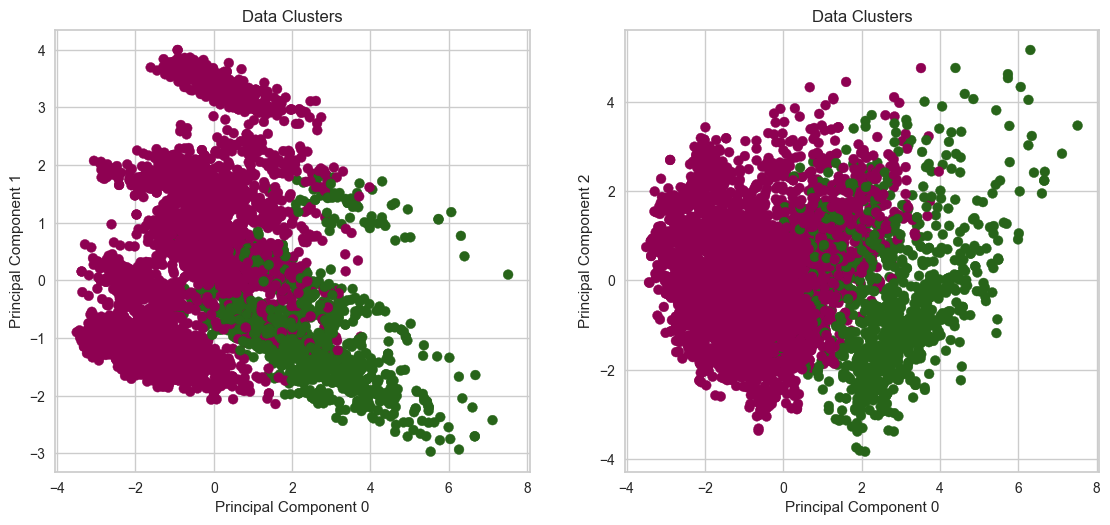

In [55]:
agglomerative = AgglomerativeClustering(n_clusters=2)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

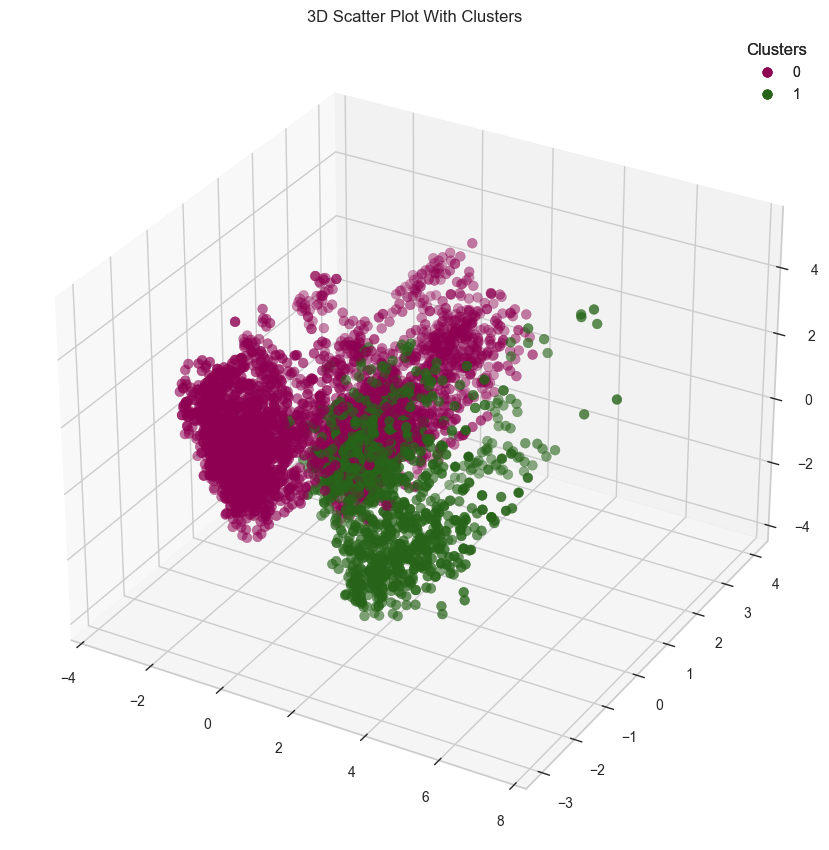

In [56]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

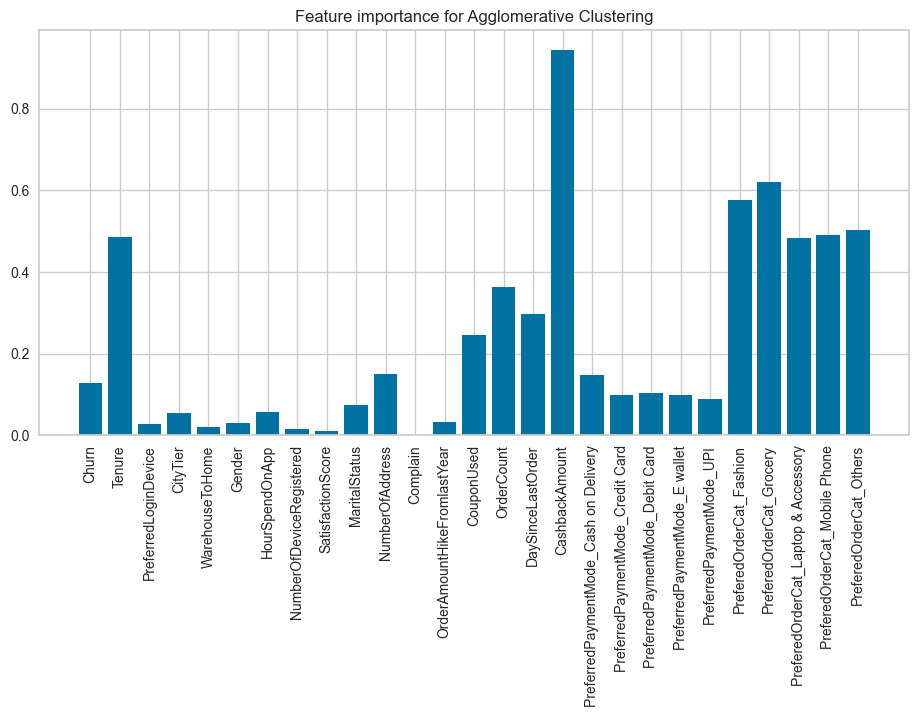

In [57]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

In [58]:
important_columns = df.columns[feature_importance > 0.3]
print(important_columns)

Index(['Tenure', 'OrderCount', 'CashbackAmount', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others'],
      dtype='object')


In [59]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(2)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(2), index=important_columns)

In [563]:
cluster_data

0         1
Tenure                              -0.151801  1.225897
OrderCount                          -0.074940  0.605190
DaySinceLastOrder                   -0.066118  0.533950
CashbackAmount                      -0.269792  2.178759
PreferedOrderCat_Grocery            -0.251745  2.033022
PreferedOrderCat_Laptop & Accessory  0.093819 -0.757658
PreferedOrderCat_Mobile Phone        0.094922 -0.766563
PreferedOrderCat_Others             -0.218550  1.764947

Klaster 0 - kraće ukupno iskustvo sa kompanijom, manji/prosečan broj porudžbina, nešto kraći vremenski period od poslednje porudžbine, manji povraćaj novca,  korisnici koji pripadaju ovom klasteru preferiraju kategorije Mobile Phone i Laptop & Accessory <br> 
Klaster 1 - dugačko ukupno iskustvo sa kompanijom, značajno veći broj porudžbina, duži vremenski period od poslednje porudžbine, osobe koje generalno dobijaju više povrata novca, preferiraju kategorije Grocery i Others

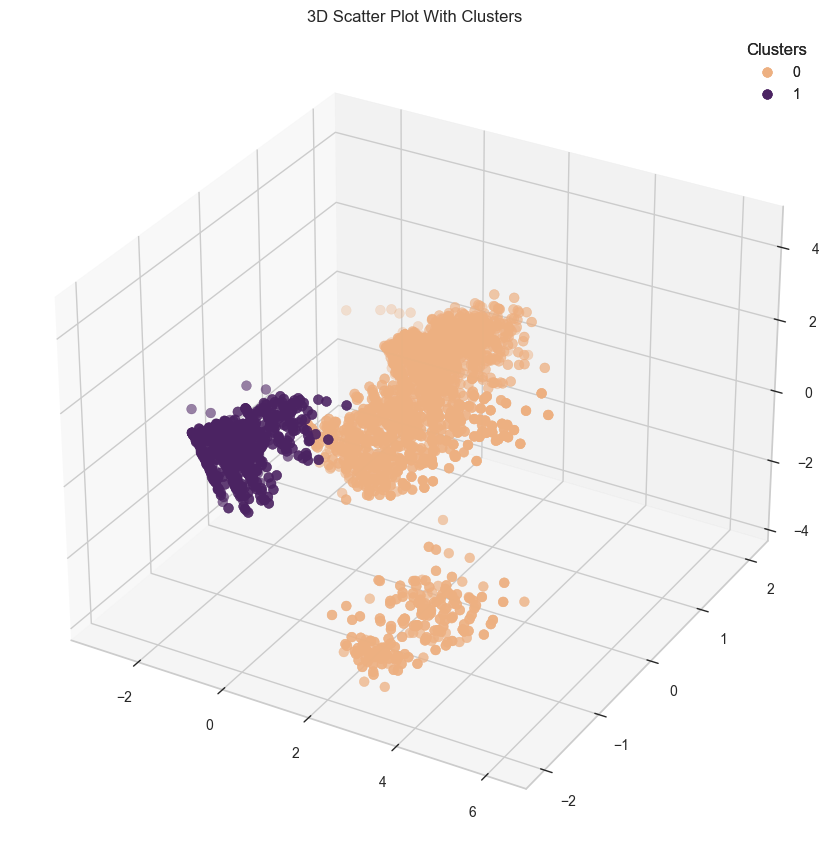

In [62]:
selected_columns = ['Tenure', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others']

df_selected = df[selected_columns].copy()

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(df_selected)

agg = AgglomerativeClustering(n_clusters=2)
clusters = agg.fit_predict(df_selected)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], c=clusters, cmap='flare', s=50)

ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

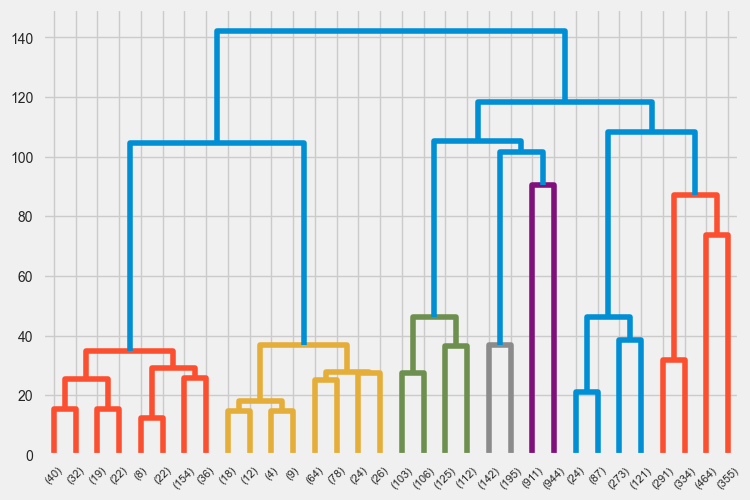

In [149]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

#### Agglomerative - 3 klastera

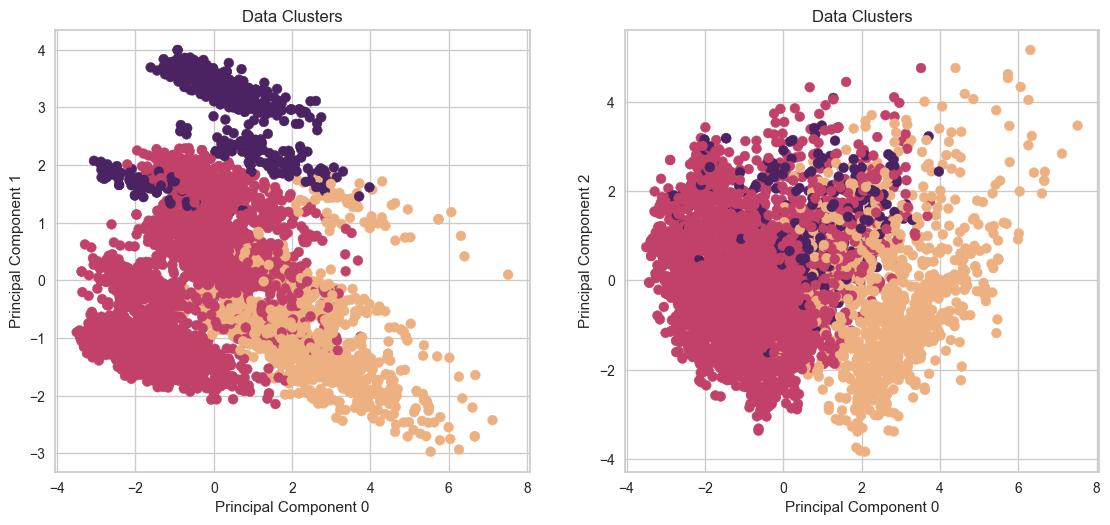

In [63]:
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

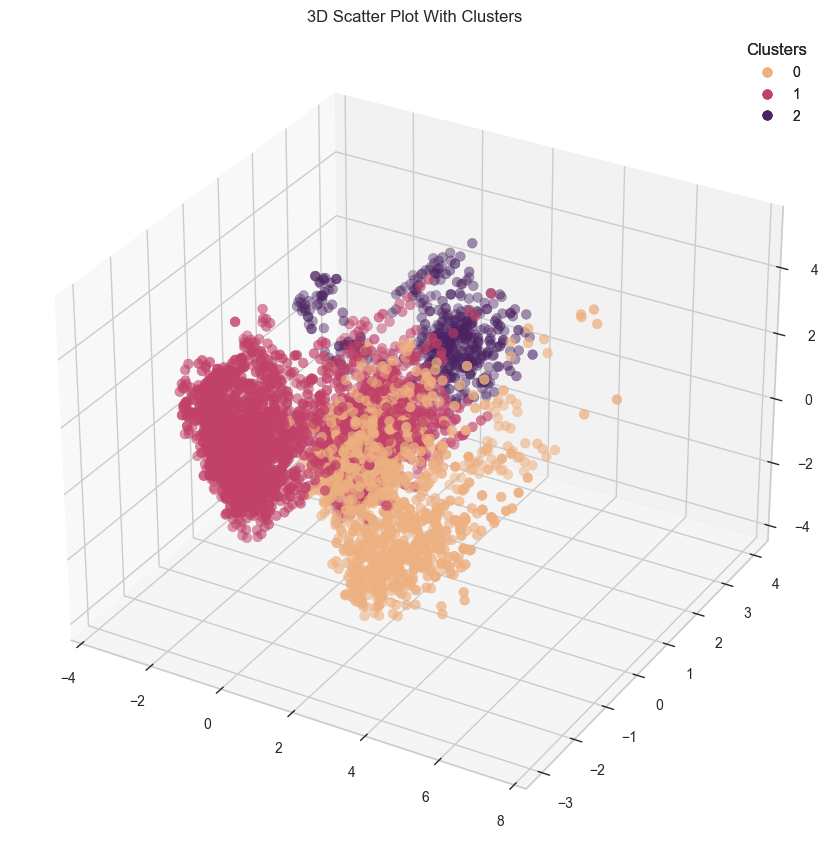

In [64]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

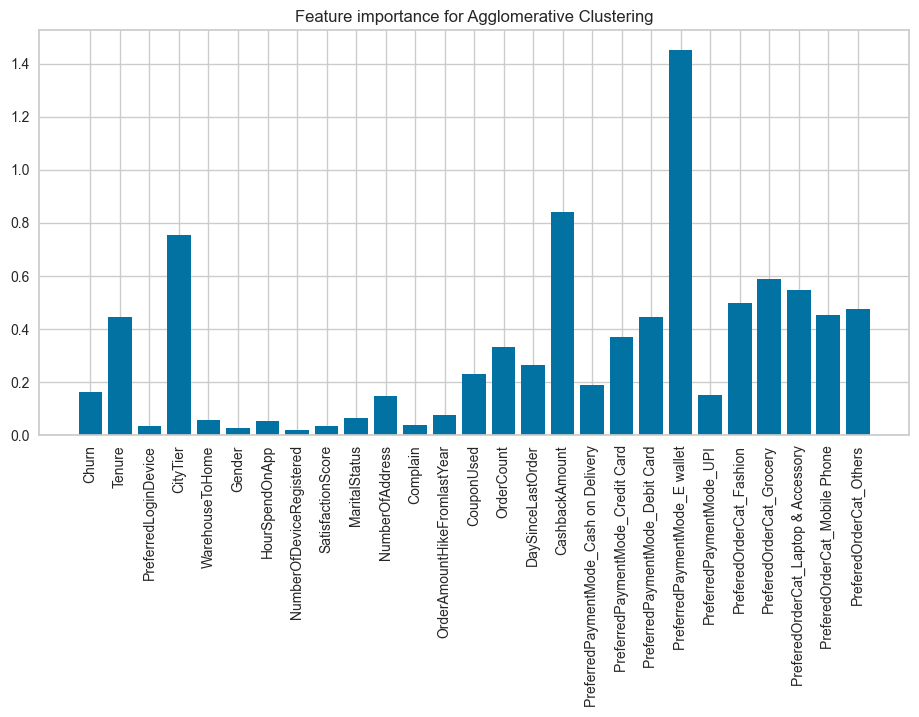

In [66]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

In [67]:
important_columns = df.columns[feature_importance > 0.3]
print(important_columns)

Index(['Tenure', 'CityTier', 'OrderCount', 'CashbackAmount',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others'],
      dtype='object')


In [68]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(3)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(3), index=important_columns)

In [69]:
cluster_data

0         1         2
Tenure                               0.758847 -0.220680 -0.141286
CityTier                            -0.083728 -0.182630  1.461571
OrderCount                           0.567307 -0.165610 -0.101213
CashbackAmount                       1.479646 -0.456981 -0.089056
PreferredPaymentMode_Credit Card     0.154389  0.048221 -0.679286
PreferredPaymentMode_Debit Card      0.163155  0.066873 -0.829033
PreferredPaymentMode_E wallet       -0.155898 -0.354402  2.821655
PreferedOrderCat_Fashion             0.904105 -0.314902  0.194805
PreferedOrderCat_Grocery             0.973380 -0.269897 -0.273242
PreferedOrderCat_Laptop & Accessory -0.757572  0.161674  0.550685
PreferedOrderCat_Mobile Phone       -0.766480  0.308425 -0.454783
PreferedOrderCat_Others              0.787136 -0.218595 -0.218595

Klaster 0 - srednje (prosečno) ukupno iskustvo sa kompanijom, prosečan broj porudžbina, srednji vremenski period od poslednje porudžbine, manji povraćaj novca, preferiraju plaćanje putem elektronskog novčanika, korisnici koji pripadaju ovom klasteru preferiraju kategorije Fashion i Accessory <br> 
Klaster 1 - dugačko ukupno iskustvo sa kompanijom, značajno veći broj porudžbina, duži vremenski period od poslednje porudžbine, osobe koje generalno dobijaju puno više povrata novca, preferiraju kategorije Grocery i Others <br>
Klaster 2 - kraće ukupno iskustvo sa kompanijom, manji broj porudžbina, drastično manji povraćaj novca, osobe koje preferiraju kategoriju Mobile Phone

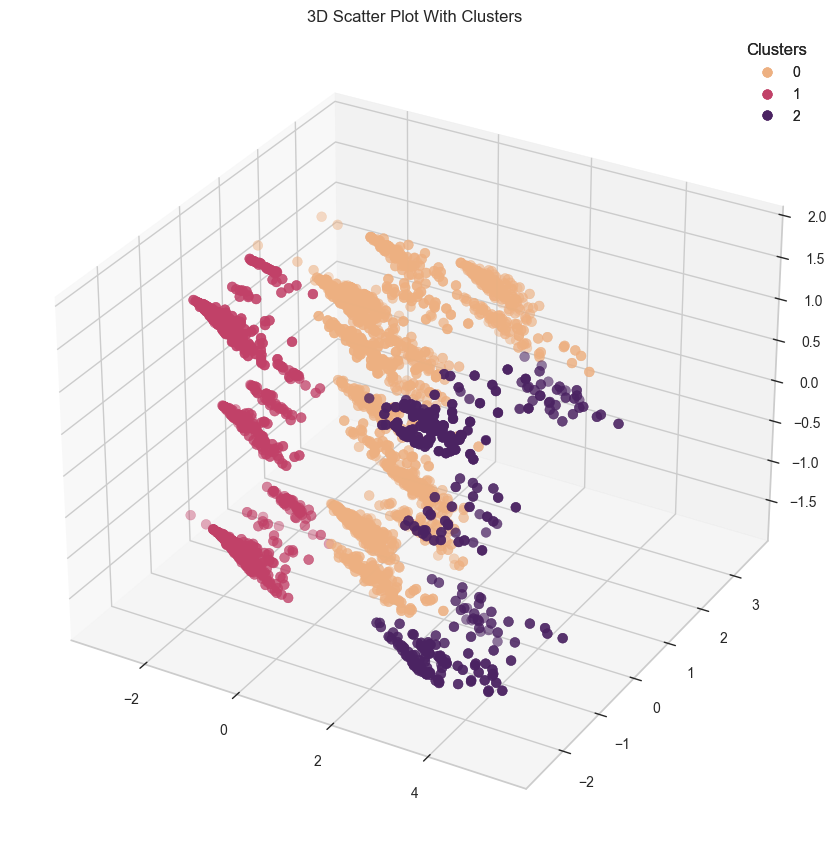

In [70]:
selected_columns = ['Tenure', 'CityTier', 'OrderCount', 'CashbackAmount',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others']

df_selected = df[selected_columns].copy()

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(df_selected)

agg = AgglomerativeClustering(n_clusters=3)
clusters = agg.fit_predict(df_selected)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], c=clusters, cmap='flare', s=50)

ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

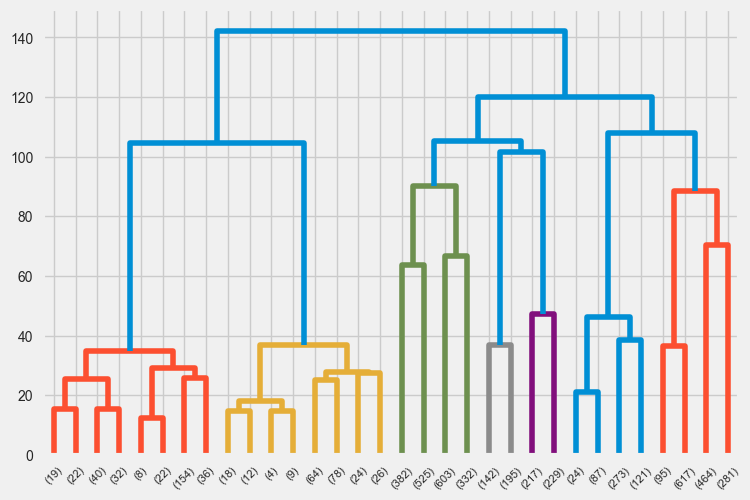

In [572]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

### DBSCAN

5155


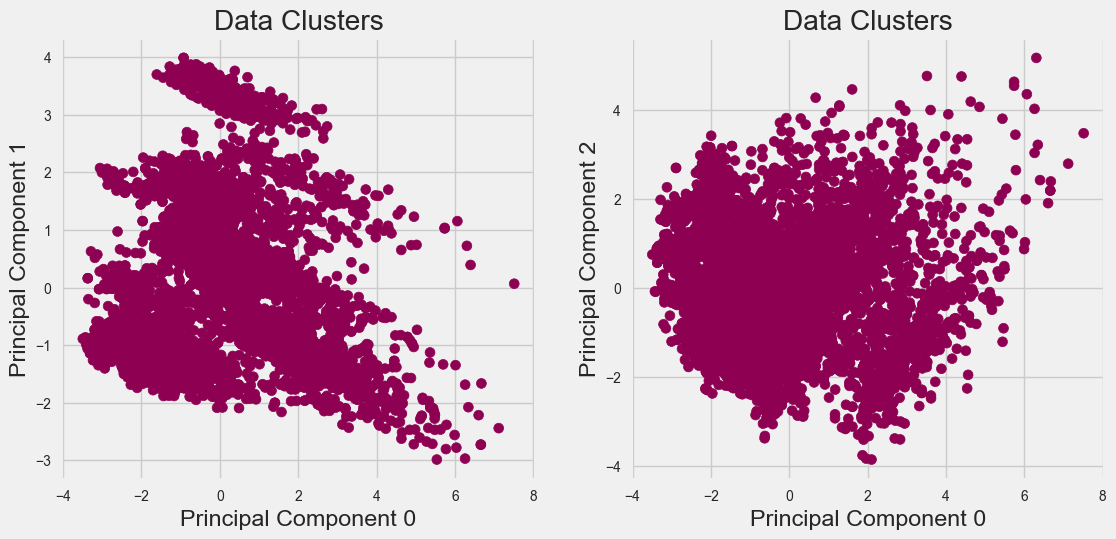

In [573]:
from sklearn.cluster import DBSCAN

def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

dbscan = DBSCAN(metric=cosine_distance, eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(df)

print((y_dbscan != -1).sum())

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=y_dbscan, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

In [574]:
num_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)

#print(f"Number of clusters predicted by DBSCAN: {num_clusters}")

### HDBSCAN

5112


<Figure size 2000x500 with 0 Axes>

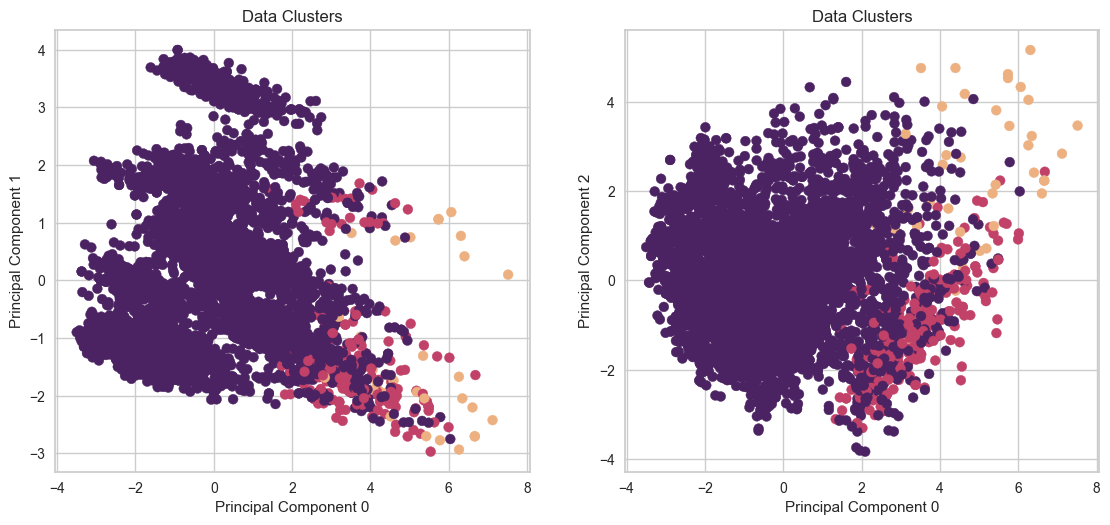

In [74]:
import hdbscan

hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
y_hdbscan = hdbscan_clusterer.fit_predict(df)

print((y_hdbscan != -1).sum())

plt.figure(figsize=(20, 5))

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=y_hdbscan, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

In [76]:
num_clusters = len(set(y_hdbscan)) #- (1 if -1 in y_hdbscan else 0)

print(f"Number of clusters predicted by HDBSCAN: {num_clusters}")

Number of clusters predicted by HDBSCAN: 3


### Gaussian Mixture 

#### Odredjivanje optimalnog broja klastera za Gaussian Mixture

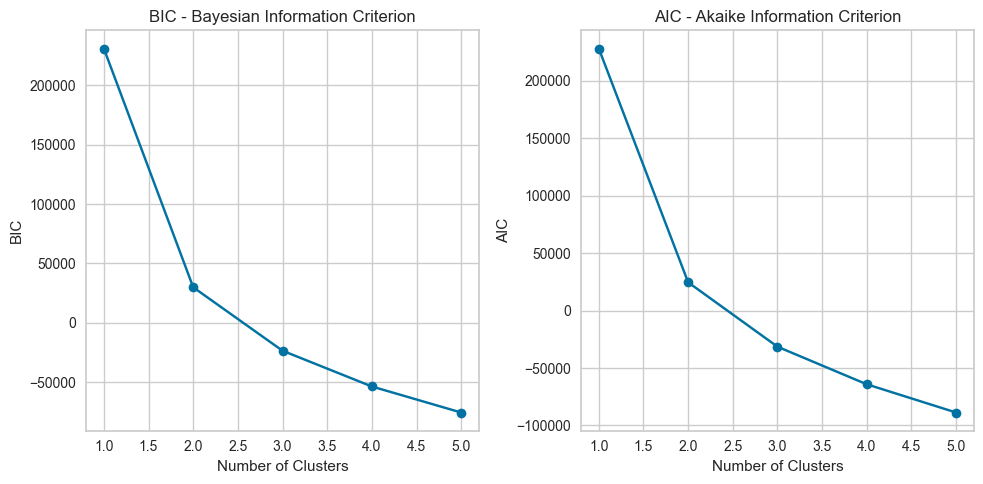

Optimal number of clusters based on BIC: 5
Optimal number of clusters based on AIC: 5


In [81]:
from sklearn.mixture import GaussianMixture

n_clusters_range = range(1, 6)
bics = []
aics = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(df)
    bics.append(gmm.bic(df))
    aics.append(gmm.aic(df))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, bics, marker='o')
plt.title('BIC - Bayesian Information Criterion')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, aics, marker='o')
plt.title('AIC - Akaike Information Criterion')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')

plt.tight_layout()
plt.show()

optimal_clusters_bic = n_clusters_range[np.argmin(bics)]
optimal_clusters_aic = n_clusters_range[np.argmin(aics)]

print(f'Optimal number of clusters based on BIC: {optimal_clusters_bic}')
print(f'Optimal number of clusters based on AIC: {optimal_clusters_aic}')

#### Gaussian Mixture - 5 klastera

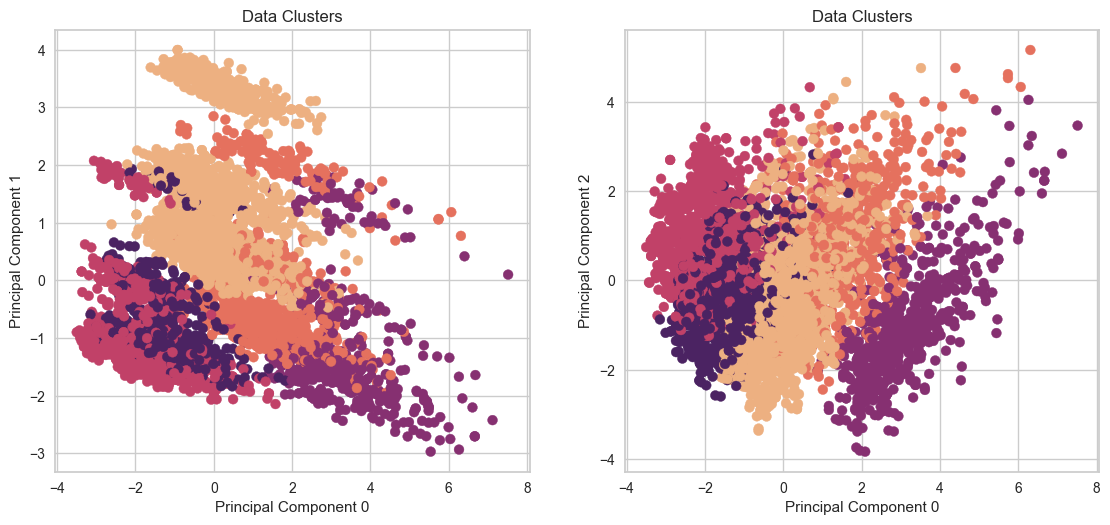

In [83]:
gmm = GaussianMixture(n_components=5, random_state=42)
clusters = gmm.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

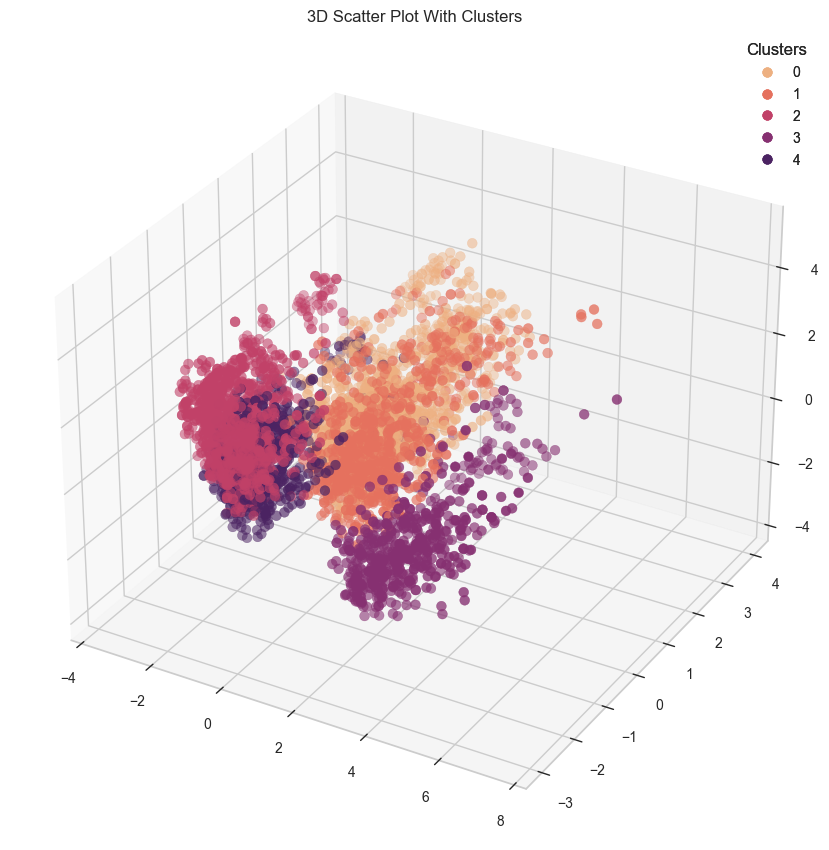

In [84]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

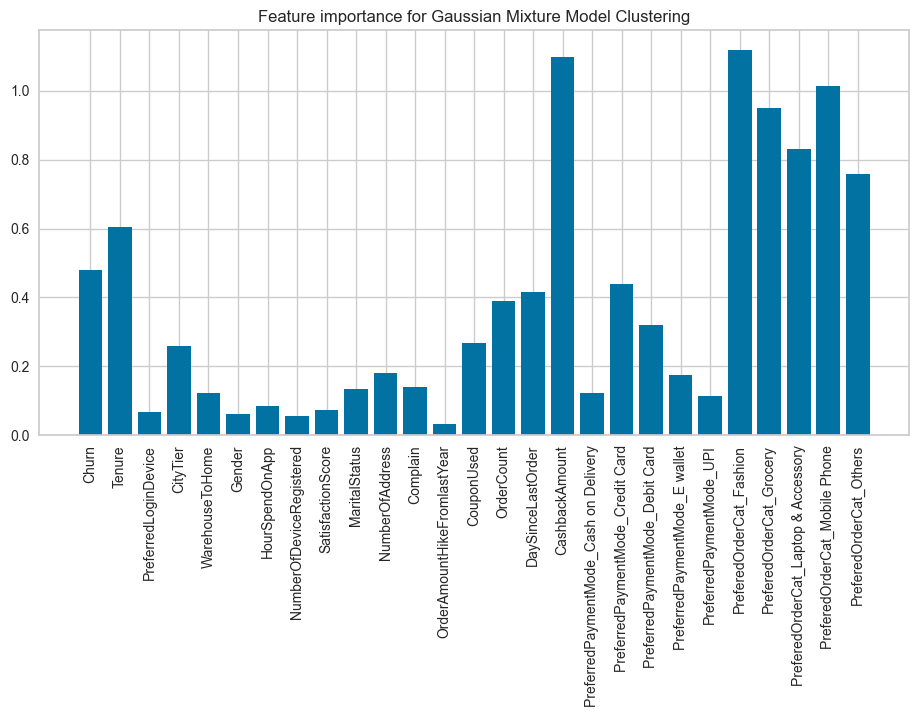

In [85]:
centroids = np.array([df.loc[clusters == label].mean(axis=0) for label in np.unique(clusters)])

feature_importance = centroids.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Gaussian Mixture Model Clustering')
plt.show()

In [86]:
important_columns = df.columns[feature_importance > 0.3]
print(important_columns)

Index(['Churn', 'Tenure', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others'],
      dtype='object')


In [87]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(5)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(5), index=important_columns)

In [88]:
cluster_data

0         1         2         3  \
Churn                               -0.177712 -0.029846  0.899537 -0.322062   
Tenure                              -0.067126  0.240562 -0.572123  1.210172   
OrderCount                          -0.075252  0.380799 -0.294872  0.682484   
DaySinceLastOrder                    0.122723  0.397674 -0.476512  0.544605   
CashbackAmount                      -0.197624  0.686061 -0.761805  2.153576   
PreferredPaymentMode_Credit Card    -0.079316 -0.056653  0.701260  0.086228   
PreferredPaymentMode_Debit Card     -0.009081 -0.048062 -0.436058  0.035866   
PreferedOrderCat_Fashion            -0.420420  2.378576 -0.420420 -0.420420   
PreferedOrderCat_Grocery            -0.273242 -0.273242 -0.273242  2.101151   
PreferedOrderCat_Laptop & Accessory  1.320006 -0.757572 -0.757572 -0.757572   
PreferedOrderCat_Mobile Phone       -0.766480 -0.766480  1.304665 -0.766480   
PreferedOrderCat_Others             -0.218595 -0.218595 -0.218595  1.680931   

                                            4  
Churn                               -0.448515  
Tenure                              -0.210295  
OrderCount                          -0.289944  
DaySinceLastOrder                   -0.421822  
CashbackAmount                      -0.743311  
PreferredPaymentMode_Credit Card    -0.679286  
PreferredPaymentMode_Debit Card      0.562275  
PreferedOrderCat_Fashion            -0.420420  
PreferedOrderCat_Grocery            -0.273242  
PreferedOrderCat_Laptop & Accessory -0.757572  
PreferedOrderCat_Mobile Phone        1.304665  
PreferedOrderCat_Others             -0.218595

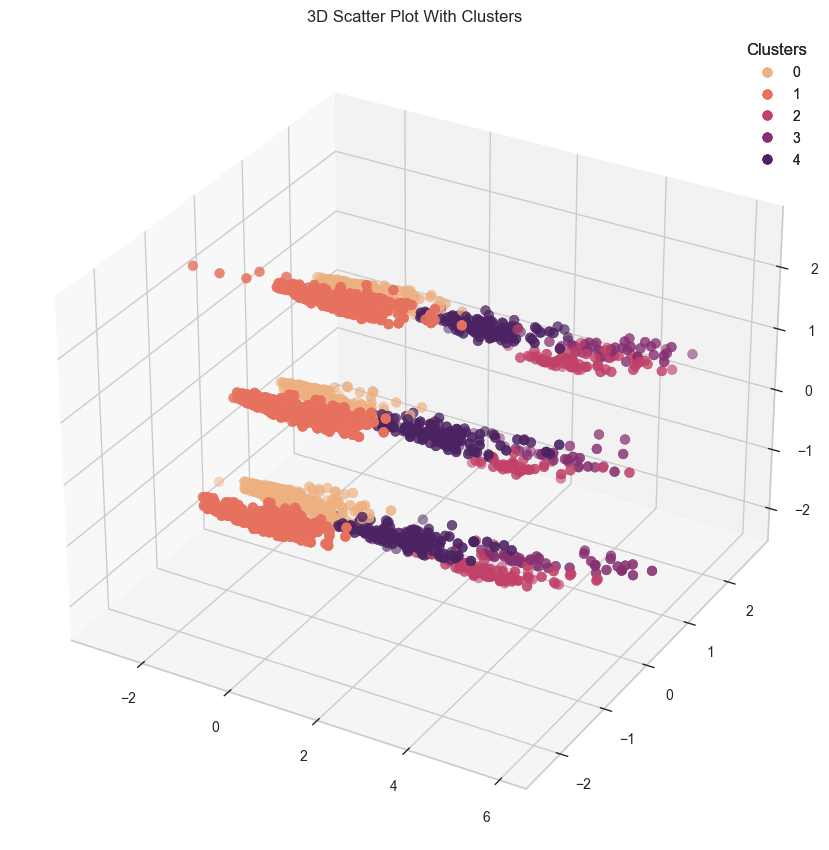

In [93]:
selected_columns = ['Churn', 'Tenure', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others']

df_selected = df[selected_columns].copy()

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(df_selected)

gmm = GaussianMixture(n_components=5)
clusters = gmm.fit_predict(df_selected)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], X_pca_selected[:, 2], c=clusters, cmap='flare', s=50)

ax.set_title('3D Scatter Plot With Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

### Mean Shift

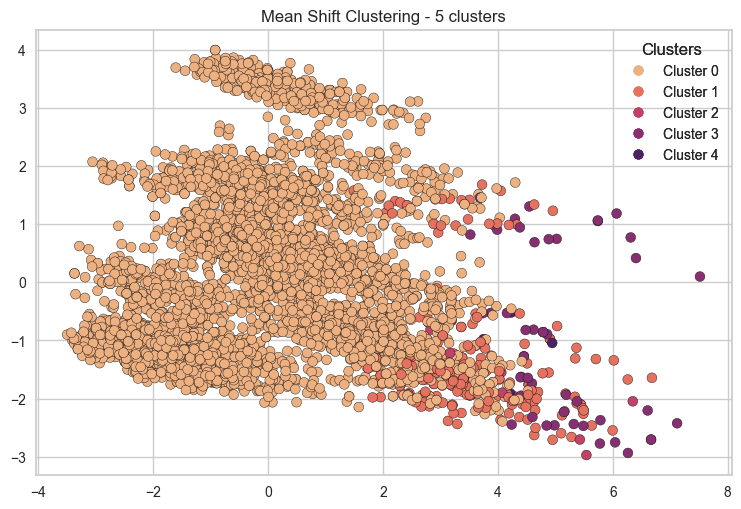

In [110]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(df, quantile=0.1, n_samples=50)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(df)

cluster_centers = ms.cluster_centers_
labels = ms.labels_

n_clusters = len(np.unique(labels))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='flare', s=50, edgecolors='k', marker='o')
#plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')

legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
scatter_legend = plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.gca().add_artist(scatter_legend)

plt.title(f'Mean Shift Clustering - {n_clusters} clusters')
plt.show()

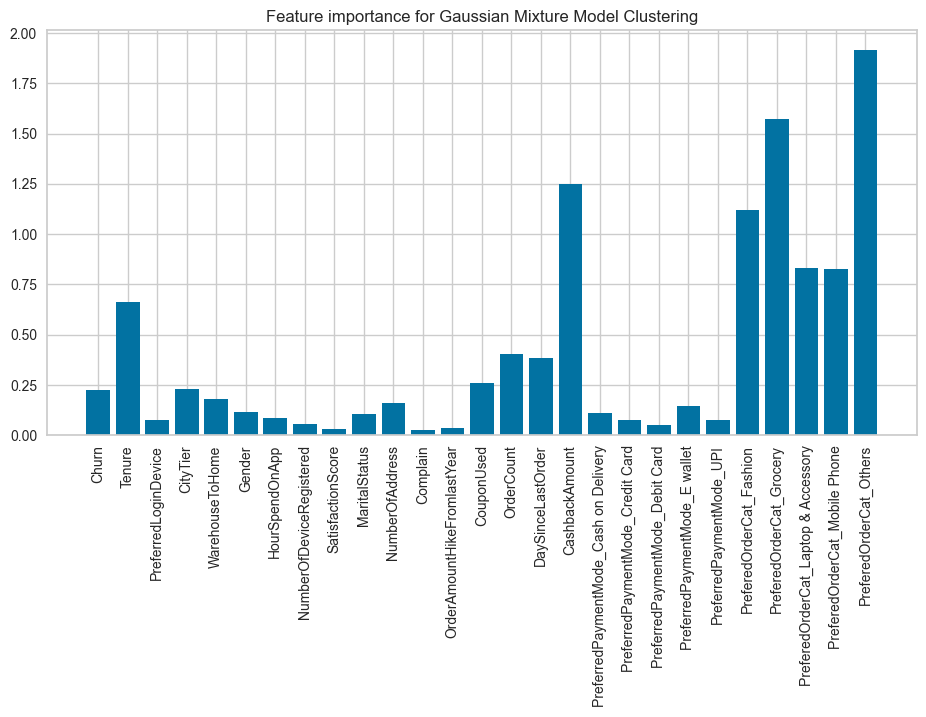

In [112]:
centroids = np.array([df.loc[clusters == label].mean(axis=0) for label in np.unique(clusters)])

feature_importance = centroids.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Gaussian Mixture Model Clustering')
plt.show()

In [113]:
important_columns = df.columns[feature_importance > 0.3]
print(important_columns)

Index(['Tenure', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others'],
      dtype='object')


In [114]:
cluster_data = np.array([df[clusters == i][important_columns].mean(axis=0) for i in range(5)])
cluster_data = pd.DataFrame(cluster_data.T, columns=range(5), index=important_columns)

In [115]:
cluster_data

0         1         2         3  \
Tenure                              -0.407811 -0.067126  1.221413  1.193047   
OrderCount                          -0.292634 -0.075252  0.635160  0.754576   
DaySinceLastOrder                   -0.451676  0.122723  0.471809  0.655503   
CashbackAmount                      -0.753407 -0.197624  1.854209  2.609633   
PreferedOrderCat_Fashion            -0.420420 -0.420420 -0.420420 -0.420420   
PreferedOrderCat_Grocery            -0.273242 -0.273242  3.659762 -0.273242   
PreferedOrderCat_Laptop & Accessory -0.757572  1.320006 -0.757572 -0.757572   
PreferedOrderCat_Mobile Phone        1.304665 -0.766480 -0.766480 -0.766480   
PreferedOrderCat_Others             -0.218595 -0.218595 -0.218595  4.574676   

                                            4  
Tenure                               0.240562  
OrderCount                           0.380799  
DaySinceLastOrder                    0.397674  
CashbackAmount                       0.686061  
PreferedOrderCat_Fashion             2.378576  
PreferedOrderCat_Grocery            -0.273242  
PreferedOrderCat_Laptop & Accessory -0.757572  
PreferedOrderCat_Mobile Phone       -0.766480  
PreferedOrderCat_Others             -0.218595

### Spectral Clustering

In [1]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, random_state=42)
labels = spectral.fit_predict(df)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k', marker='o')
plt.title(f'Spectral Clustering')
plt.show()

NameError: name 'df' is not defined